### Predicting which outpatients at high risk of being admitted to hospital for Chronic Heart Failure.
- Using DE-SynPUF inpatient and outpatient files downloaded from https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html
- This is run using original IP/OP dataset merged with Beneficiary Chronic Conditions.

In [1]:
# import and read intial file Michelle has transformed/merged from inpatient/outpatient recods, 
# use NaN for elements with no values
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

df = pd.read_csv("OpToIp_OpNoAdmsn_Merged_Reduced_agg_DiagCode_join_BenefTable_ChronicalCond2.csv", na_values = ['no info', '.'],low_memory=False)

In [2]:
#print(df.head(5))
print(df.shape) 

(1609245, 39)


In [3]:
#df.dtypes
print(df.columns)

Index(['MEMBER_ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'Median(days_op_to_ip)',
       'HF label', 'BENE_SEX_IDENT_CD', 'SP_STATE_CODE', 'BENE_RACE_CD', 'Age',
       'Year', 'BENE_ESRD_IND', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN',
       'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT',
       'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA'],
      dtype='object')


In [5]:
df.head(5)

,MEMBER_ID,1,2,3,4,5,6,7,8,9,...,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
0,00000B48BCF4AD29,0,1,1,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,2,1
1,00001C24EE7B06AC,0,0,0,0,0,0,1,0,0,...,2,2,2,2,2,2,2,2,2,2
2,00003539A5D77654,0,0,0,0,2,0,1,0,0,...,2,2,2,2,2,2,2,2,2,2
3,0000525AB30E4DEF,0,0,2,0,0,1,1,0,1,...,1,1,2,1,2,1,1,2,2,1
4,00005B007DDAAC31,0,0,0,0,0,0,1,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
# looking at count of catagorical data
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       'Median(days_op_to_ip)', 'HF label', 'BENE_SEX_IDENT_CD',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age', 'BENE_ESRD_IND', 'SP_ALZHDMTA','SP_CHRNKIDN',
       'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT',
       'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

1 :
0     1386369
1      173849
2       37184
3        8093
4        2281
5         780
6         281
7         160
8          89
9          50
10         33
11         22
13         11
12         10
14         10
15          7
16          5
17          5
19          2
20          2
21          1
22          1
Name: 1, dtype: int64 

2 :
0     1069484
1      282609
2      126225
3       55860
4       28448
5       15669
6        9219
7        5973
8        3957
9        2846
10       2065
11       1603
12       1279
13        958
14        756
15        583
16        448
17        319
18        269
19        191
20        119
21         98
22         85
23         52
24         42
25         26
27         21
26         20
28          6
29          5
31          5
33          2
34          1
32          1
38          1
Name: 2, dtype: int64 

3 :
0     516440
1     316528
2     222307
3     157997
4     115203
5      84690
6      61214
7      43186
8      30386
9      20937
10     13921

S    583787
W    353972
N    339743
M    306728
O     25015
Name: SP_STATE_CODE, dtype: int64 

BENE_RACE_CD :
1    1356326
2     158726
3      59784
5      34409
Name: BENE_RACE_CD, dtype: int64 

Age :
69    71174
66    71090
65    71006
68    70945
67    70700
70    61187
71    61037
74    60918
73    60802
72    60789
79    51627
77    51576
76    51556
78    51395
75    51126
80    42973
81    42658
82    42621
84    42585
83    42583
89    27878
85    27692
88    27625
86    27486
87    27195
57    11672
59    11631
61    11576
62    11563
60    11560
      ...  
50     8104
99     8096
91     8074
93     8050
90     8012
95     7960
92     7927
97     7909
98     7907
96     7890
43     4160
42     4124
39     4064
44     4055
37     4047
38     4031
35     4028
41     3959
36     3924
40     3897
28     2331
33     2312
31     2289
29     2273
26     2273
25     2260
32     2234
27     2221
34     2209
30     2203
Name: Age, Length: 75, dtype: int64 

BENE_ESRD_IND :
0    14608

In [9]:
df_model=df[['1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15',
             '16', '17', '18', '19','BENE_SEX_IDENT_CD','SP_STATE_CODE', 'BENE_RACE_CD', 'Age',
             'SP_ALZHDMTA','SP_CHRNKIDN','SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT',
               'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA','HF label']]

In [10]:
# rename HF label column so no space
df_model.rename(columns={'HF label':'HF_label','BENE_SEX_IDENT_CD':'BENE_SEX'}, inplace = True)
df_model.head(5)

C:\Users\barba\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,1,2,3,4,5,6,7,8,9,10,...,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,HF_label
0,0,1,1,0,0,0,0,0,0,0,...,1,1,2,1,1,1,1,2,1,1
1,0,0,0,0,0,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0
2,0,0,0,0,2,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0
3,0,0,2,0,0,1,1,0,1,1,...,1,2,1,2,1,1,2,2,1,0
4,0,0,0,0,0,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0


### Exploratory Data Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df_model['HF_label'].value_counts()

0    1580361
1      28884
Name: HF_label, dtype: int64

0    1580361
1      28884
Name: HF_label, dtype: int64


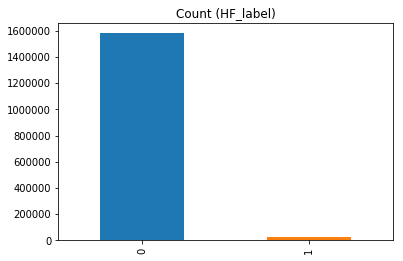

In [20]:
#sns.countplot(x='HF_label', data=df_model)

print(df_model.HF_label.value_counts())
df_model.HF_label.value_counts().plot(kind='bar', title='Count (HF_label)');

In [13]:
# encode and write file for use
#Binary Encoding Catergorical Variables without Order
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['SP_STATE_CODE','BENE_RACE_CD'])
df_encoded = encoder.fit_transform(df_model)
df_encoded.head()

,1,2,3,4,5,6,7,8,9,10,...,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,HF_label
0,0,1,1,0,0,0,0,0,0,0,...,1,1,2,1,1,1,1,2,1,1
1,0,0,0,0,0,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0
2,0,0,0,0,2,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0
3,0,0,2,0,0,1,1,0,1,1,...,1,2,1,2,1,1,2,2,1,0
4,0,0,0,0,0,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,0


In [14]:
#df_encoded.to_csv(r'C:\Users\barba\Documents\Jupyter Notebooks\healthcare_analytics_medicare_DESynPUF_dataset\project_modeling_imbal_data.csv')

### Balance classes

In [15]:
# Class count
count_class_0, count_class_1 = df_model.HF_label.value_counts()

# Divide by class
df_class_0 = df_model[df_model['HF_label'] == 0]
df_class_1 = df_model[df_model['HF_label'] == 1]

Random under-sampling:
1    28884
0    28884
Name: HF_label, dtype: int64


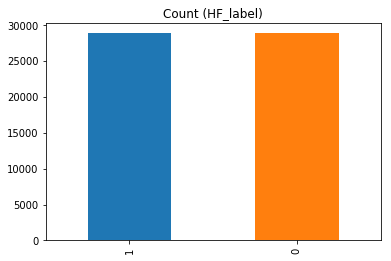

In [16]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.HF_label.value_counts())

df_test_under.HF_label.value_counts().plot(kind='bar', title='Count (HF_label)');

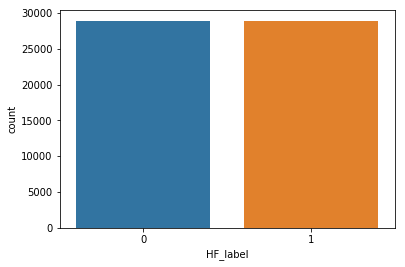

In [17]:
sns.countplot(x='HF_label', data=df_test_under)

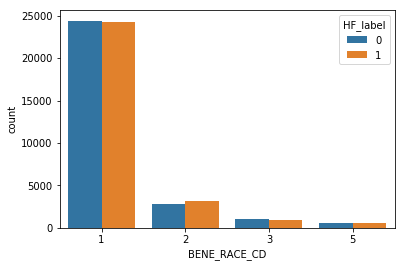

In [21]:
# 4280 frequency for race catagory
# {1:'White',2:'Black',3:'Other', 5:'Hispanic'}
sns.countplot(data=df_test_under,x='BENE_RACE_CD',hue='HF_label')

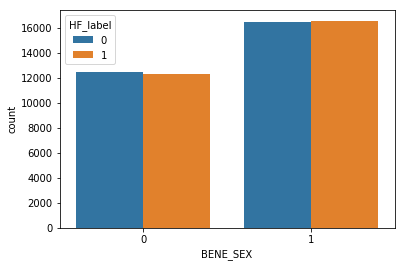

In [22]:
# 4280 frequency for race catagory
# {1:'White',2:'Black',3:'Other', 5:'Hispanic'}
sns.countplot(data=df_test_under,x='BENE_SEX',hue='HF_label')

In [ ]:
sns.countplot(data=df_test_under,x='SP_STATE_CODE',hue='HF_label')

In [ ]:
# looking at count of catagorical data
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','BENE_SEX',
       'SP_STATE_CODE', 'BENE_RACE_CD', 'Age', 'HF_label']
for name in cols:
    print(name,':')
    print(df_test_under[name].value_counts(),'\n')

### Encode and Apply Model

In [23]:
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
print(df_test_under.columns)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', 'BENE_SEX', 'SP_STATE_CODE',
       'BENE_RACE_CD', 'Age', 'SP_ALZHDMTA', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'HF_label'],
      dtype='object')


In [25]:
df_test_under.head()

,1,2,3,4,5,6,7,8,9,10,...,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,HF_label
1001552,0,0,2,0,1,0,1,0,4,1,...,2,2,2,2,2,2,2,2,2,0
58262,0,0,0,0,0,0,2,1,2,0,...,2,2,2,2,2,2,2,2,2,0
1548570,0,1,1,1,0,0,1,0,2,1,...,1,2,2,2,1,2,2,2,2,0
1444886,0,0,0,0,1,0,1,2,1,2,...,1,2,2,2,1,1,2,2,2,0
933221,0,1,4,0,0,0,4,0,0,0,...,2,2,2,2,2,1,2,2,2,0


In [26]:
#Binary Encoding Catergorical Variables without Order
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['SP_STATE_CODE','BENE_RACE_CD'])
df_encoded = encoder.fit_transform(df_test_under)
df_encoded.head()

,1,2,3,4,5,6,7,8,9,10,...,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,HF_label
1001552,0,0,2,0,1,0,1,0,4,1,...,2,2,2,2,2,2,2,2,2,0
58262,0,0,0,0,0,0,2,1,2,0,...,2,2,2,2,2,2,2,2,2,0
1548570,0,1,1,1,0,0,1,0,2,1,...,1,2,2,2,1,2,2,2,2,0
1444886,0,0,0,0,1,0,1,2,1,2,...,1,2,2,2,1,1,2,2,2,0
933221,0,1,4,0,0,0,4,0,0,0,...,2,2,2,2,2,1,2,2,2,0


In [27]:
print(df_encoded.columns)
#df_encoded.to_csv(r'C:\Users\barba\Documents\Jupyter Notebooks\healthcare_analytics_medicare_DESynPUF_dataset\project_modeling_bal_data.csv')

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', 'BENE_SEX', 'SP_STATE_CODE_0',
       'SP_STATE_CODE_1', 'SP_STATE_CODE_2', 'SP_STATE_CODE_3',
       'BENE_RACE_CD_0', 'BENE_RACE_CD_1', 'BENE_RACE_CD_2', 'Age',
       'SP_ALZHDMTA', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'HF_label'],
      dtype='object')


In [28]:
# split data for test/train
X = df_encoded.drop(['HF_label'], axis=1)
y = df_encoded['HF_label']
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [29]:
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 70)
param_grid = {
    'n_estimators': [x for x in range(20, 100, 4)],
    'learning_rate': [0.05, 0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.681642	valid_0's l1: 0.494093
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772778	valid_0's binary_logloss: 0.671203	valid_0's l1: 0.48845
[3]	valid_0's auc: 0.77328	valid_0's binary_logloss: 0.661789	valid_0's l1: 0.483101
[4]	valid_0's auc: 0.774166	valid_0's binary_logloss: 0.653293	valid_0's l1: 0.478039
[5]	valid_0's auc: 0.775051	valid_0's binary_logloss: 0.645591	valid_0's l1: 0.473233
[6]	valid_0's auc: 0.775263	valid_0's binary_logloss: 0.638611	valid_0's l1: 0.46868
[7]	valid_0's auc: 0.775862	valid_0's binary_logloss: 0.63219	valid_0's l1: 0.464321
[8]	valid_0's auc: 0.776493	valid_0's binary_logloss: 0.62637	valid_0's l1: 0.460193
[9]	valid_0's auc: 0.77674	valid_0's binary_logloss: 0.62103	valid_0's l1: 0.456244
[10]	valid_0's auc: 0.776967	valid_0's binary_logloss: 0.616161	valid_0's l1: 0.452485
[11]	valid_0's auc: 0.776923	valid_0's binary_logloss: 0.61185	valid_0's l1: 0.448992

[18]	valid_0's auc: 0.776685	valid_0's binary_logloss: 0.590821	valid_0's l1: 0.429114
[19]	valid_0's auc: 0.776698	valid_0's binary_logloss: 0.588754	valid_0's l1: 0.426798
[20]	valid_0's auc: 0.776746	valid_0's binary_logloss: 0.586773	valid_0's l1: 0.424554
[21]	valid_0's auc: 0.776892	valid_0's binary_logloss: 0.584987	valid_0's l1: 0.422429
[22]	valid_0's auc: 0.777017	valid_0's binary_logloss: 0.58334	valid_0's l1: 0.420402
[23]	valid_0's auc: 0.777018	valid_0's binary_logloss: 0.581894	valid_0's l1: 0.418495
[24]	valid_0's auc: 0.777118	valid_0's binary_logloss: 0.580468	valid_0's l1: 0.416674
Did not meet early stopping. Best iteration is:
[24]	valid_0's auc: 0.777118	valid_0's binary_logloss: 0.580468	valid_0's l1: 0.416674
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.77166

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.771668	valid_0's binary_logloss: 0.662235	valid_0's l1: 0.483345
[4]	valid_0's auc: 0.771921	valid_0's binary_logloss: 0.65383	valid_0's l1: 0.47834
[5]	valid_0's auc: 0.773135	valid_0's binary_logloss: 0.646141	valid_0's l1: 0.473558
[6]	valid_0's auc: 0.773806	valid_0's binary_logloss: 0.639191	valid_0's l1: 0.469036
[7]	valid_0's auc: 0.773815	valid_0's binary_logloss: 0.632881	valid_0's l1: 0.464736
[8]	valid_0's auc: 0.774448	valid_0's binary_logloss: 0.627127	valid_0's l1: 0.460653
[9]	valid_0's auc: 0.774834	valid_0's binary_logloss: 0.621859	valid_0's l1: 0.45676
[10]	valid_0's auc: 0.774768	valid_0's binary_logloss: 0.617182	valid_0's l1: 0.45312
[11]	valid_0's auc: 0.774552	valid_0's binary_logloss: 0.612883	valid_0's l1: 0.4496

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.771668	valid_0's binary_logloss: 0.662235	valid_0's l1: 0.483345
[4]	valid_0's auc: 0.771921	valid_0's binary_logloss: 0.65383	valid_0's l1: 0.47834
[5]	valid_0's auc: 0.773135	valid_0's binary_logloss: 0.646141	valid_0's l1: 0.473558
[6]	valid_0's auc: 0.773806	valid_0's binary_logloss: 0.639191	valid_0's l1: 0.469036
[7]	valid_0's auc: 0.773815	valid_0's binary_logloss: 0.632881	valid_0's l1: 0.464736
[8]	valid_0's auc: 0.774448	valid_0's binary_logloss: 0.627127	valid_0's l1: 0.460653
[9]	valid_0's auc: 0.774834	valid_0's binary_logloss: 0.621859	valid_0's l1: 0.45676
[10]	valid_0's auc: 0.774768	valid_0's binary_logloss: 0.617182	valid_0's l1: 0.45312
[11]	valid_0's auc: 0.774552	valid_0's binary_logloss: 0.612883	valid_0's l1: 0.4496

[27]	valid_0's auc: 0.777597	valid_0's binary_logloss: 0.576861	valid_0's l1: 0.411638
[28]	valid_0's auc: 0.777796	valid_0's binary_logloss: 0.575831	valid_0's l1: 0.410118
[29]	valid_0's auc: 0.777805	valid_0's binary_logloss: 0.574983	valid_0's l1: 0.408705
[30]	valid_0's auc: 0.778055	valid_0's binary_logloss: 0.574083	valid_0's l1: 0.40731
[31]	valid_0's auc: 0.778201	valid_0's binary_logloss: 0.573337	valid_0's l1: 0.40603
[32]	valid_0's auc: 0.778086	valid_0's binary_logloss: 0.572741	valid_0's l1: 0.404841
[33]	valid_0's auc: 0.77828	valid_0's binary_logloss: 0.572106	valid_0's l1: 0.403674
[34]	valid_0's auc: 0.778409	valid_0's binary_logloss: 0.5715	valid_0's l1: 0.402555
[35]	valid_0's auc: 0.778508	valid_0's binary_logloss: 0.570934	valid_0's l1: 0.401467
[36]	valid_0's auc: 0.77873	valid_0's binary_logloss: 0.570346	valid_0's l1: 0.400423
Did not meet early stopping. Best iteration is:
[36]	valid_0's auc: 0.77873	valid_0's binary_logloss: 0.570346	valid_0's l1: 0.400423
[1

[18]	valid_0's auc: 0.776685	valid_0's binary_logloss: 0.590821	valid_0's l1: 0.429114
[19]	valid_0's auc: 0.776698	valid_0's binary_logloss: 0.588754	valid_0's l1: 0.426798
[20]	valid_0's auc: 0.776746	valid_0's binary_logloss: 0.586773	valid_0's l1: 0.424554
[21]	valid_0's auc: 0.776892	valid_0's binary_logloss: 0.584987	valid_0's l1: 0.422429
[22]	valid_0's auc: 0.777017	valid_0's binary_logloss: 0.58334	valid_0's l1: 0.420402
[23]	valid_0's auc: 0.777018	valid_0's binary_logloss: 0.581894	valid_0's l1: 0.418495
[24]	valid_0's auc: 0.777118	valid_0's binary_logloss: 0.580468	valid_0's l1: 0.416674
[25]	valid_0's auc: 0.7773	valid_0's binary_logloss: 0.579119	valid_0's l1: 0.414891
[26]	valid_0's auc: 0.777545	valid_0's binary_logloss: 0.577899	valid_0's l1: 0.413194
[27]	valid_0's auc: 0.777597	valid_0's binary_logloss: 0.576861	valid_0's l1: 0.411638
[28]	valid_0's auc: 0.777796	valid_0's binary_logloss: 0.575831	valid_0's l1: 0.410118
[29]	valid_0's auc: 0.777805	valid_0's binary_

[30]	valid_0's auc: 0.778535	valid_0's binary_logloss: 0.573609	valid_0's l1: 0.406947
[31]	valid_0's auc: 0.778611	valid_0's binary_logloss: 0.572953	valid_0's l1: 0.40571
[32]	valid_0's auc: 0.778587	valid_0's binary_logloss: 0.572277	valid_0's l1: 0.404505
[33]	valid_0's auc: 0.778623	valid_0's binary_logloss: 0.571641	valid_0's l1: 0.403309
[34]	valid_0's auc: 0.778593	valid_0's binary_logloss: 0.571118	valid_0's l1: 0.402211
[35]	valid_0's auc: 0.778624	valid_0's binary_logloss: 0.570654	valid_0's l1: 0.401167
[36]	valid_0's auc: 0.778765	valid_0's binary_logloss: 0.570138	valid_0's l1: 0.400133
[37]	valid_0's auc: 0.778751	valid_0's binary_logloss: 0.569784	valid_0's l1: 0.399232
[38]	valid_0's auc: 0.778798	valid_0's binary_logloss: 0.569404	valid_0's l1: 0.398327
[39]	valid_0's auc: 0.778929	valid_0's binary_logloss: 0.568997	valid_0's l1: 0.39744
[40]	valid_0's auc: 0.779105	valid_0's binary_logloss: 0.568628	valid_0's l1: 0.39665
[41]	valid_0's auc: 0.779122	valid_0's binary_

[36]	valid_0's auc: 0.777725	valid_0's binary_logloss: 0.571333	valid_0's l1: 0.401279
[37]	valid_0's auc: 0.777905	valid_0's binary_logloss: 0.57082	valid_0's l1: 0.400323
[38]	valid_0's auc: 0.777817	valid_0's binary_logloss: 0.570518	valid_0's l1: 0.399458
[39]	valid_0's auc: 0.777877	valid_0's binary_logloss: 0.570162	valid_0's l1: 0.398591
[40]	valid_0's auc: 0.777986	valid_0's binary_logloss: 0.569777	valid_0's l1: 0.397753
[41]	valid_0's auc: 0.778134	valid_0's binary_logloss: 0.569376	valid_0's l1: 0.39694
[42]	valid_0's auc: 0.778314	valid_0's binary_logloss: 0.569001	valid_0's l1: 0.39617
[43]	valid_0's auc: 0.778419	valid_0's binary_logloss: 0.568643	valid_0's l1: 0.395429
[44]	valid_0's auc: 0.778484	valid_0's binary_logloss: 0.568356	valid_0's l1: 0.394726
Did not meet early stopping. Best iteration is:
[44]	valid_0's auc: 0.778484	valid_0's binary_logloss: 0.568356	valid_0's l1: 0.394726
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.681642	valid_0's l1: 0.494093

[45]	valid_0's auc: 0.779685	valid_0's binary_logloss: 0.567055	valid_0's l1: 0.393082
[46]	valid_0's auc: 0.7797	valid_0's binary_logloss: 0.566891	valid_0's l1: 0.392481
[47]	valid_0's auc: 0.779726	valid_0's binary_logloss: 0.566748	valid_0's l1: 0.391893
[48]	valid_0's auc: 0.779759	valid_0's binary_logloss: 0.566581	valid_0's l1: 0.391297
Did not meet early stopping. Best iteration is:
[48]	valid_0's auc: 0.779759	valid_0's binary_logloss: 0.566581	valid_0's l1: 0.391297
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.771668	valid_0's binary_logloss: 0.662235	valid_0's l1: 0.483345
[4]	valid_0's auc: 0.771921	valid_0's binary_logloss: 0.65383	valid_0's l1: 0.47834
[5]	valid_0's auc: 0.773135	valid_0's binary_logloss: 0.646141	valid_0's l1: 0.473558
[6]	valid_0's auc: 0.773806	vali

[40]	valid_0's auc: 0.779105	valid_0's binary_logloss: 0.568628	valid_0's l1: 0.39665
[41]	valid_0's auc: 0.779122	valid_0's binary_logloss: 0.568317	valid_0's l1: 0.395861
[42]	valid_0's auc: 0.7791	valid_0's binary_logloss: 0.568116	valid_0's l1: 0.395174
[43]	valid_0's auc: 0.77914	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.394433
[44]	valid_0's auc: 0.779109	valid_0's binary_logloss: 0.56764	valid_0's l1: 0.393758
[45]	valid_0's auc: 0.779121	valid_0's binary_logloss: 0.567441	valid_0's l1: 0.393107
[46]	valid_0's auc: 0.779136	valid_0's binary_logloss: 0.56726	valid_0's l1: 0.392503
[47]	valid_0's auc: 0.779135	valid_0's binary_logloss: 0.567099	valid_0's l1: 0.391917
[48]	valid_0's auc: 0.779053	valid_0's binary_logloss: 0.567014	valid_0's l1: 0.391364
Early stopping, best iteration is:
[43]	valid_0's auc: 0.77914	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.394433
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.681768	valid_0's l1: 0.494156
Training until v

[40]	valid_0's auc: 0.777986	valid_0's binary_logloss: 0.569777	valid_0's l1: 0.397753
[41]	valid_0's auc: 0.778134	valid_0's binary_logloss: 0.569376	valid_0's l1: 0.39694
[42]	valid_0's auc: 0.778314	valid_0's binary_logloss: 0.569001	valid_0's l1: 0.39617
[43]	valid_0's auc: 0.778419	valid_0's binary_logloss: 0.568643	valid_0's l1: 0.395429
[44]	valid_0's auc: 0.778484	valid_0's binary_logloss: 0.568356	valid_0's l1: 0.394726
[45]	valid_0's auc: 0.778486	valid_0's binary_logloss: 0.568162	valid_0's l1: 0.394098
[46]	valid_0's auc: 0.77865	valid_0's binary_logloss: 0.56786	valid_0's l1: 0.393461
[47]	valid_0's auc: 0.778697	valid_0's binary_logloss: 0.567646	valid_0's l1: 0.39286
[48]	valid_0's auc: 0.778795	valid_0's binary_logloss: 0.567438	valid_0's l1: 0.392287
[49]	valid_0's auc: 0.778832	valid_0's binary_logloss: 0.567286	valid_0's l1: 0.391738
[50]	valid_0's auc: 0.778965	valid_0's binary_logloss: 0.567064	valid_0's l1: 0.391189
[51]	valid_0's auc: 0.778929	valid_0's binary_lo

[36]	valid_0's auc: 0.77873	valid_0's binary_logloss: 0.570346	valid_0's l1: 0.400423
[37]	valid_0's auc: 0.778742	valid_0's binary_logloss: 0.569917	valid_0's l1: 0.399467
[38]	valid_0's auc: 0.778793	valid_0's binary_logloss: 0.569521	valid_0's l1: 0.398563
[39]	valid_0's auc: 0.778809	valid_0's binary_logloss: 0.569161	valid_0's l1: 0.397683
[40]	valid_0's auc: 0.779036	valid_0's binary_logloss: 0.568656	valid_0's l1: 0.39677
[41]	valid_0's auc: 0.77903	valid_0's binary_logloss: 0.568395	valid_0's l1: 0.396012
[42]	valid_0's auc: 0.779131	valid_0's binary_logloss: 0.568067	valid_0's l1: 0.395234
[43]	valid_0's auc: 0.779367	valid_0's binary_logloss: 0.567678	valid_0's l1: 0.394467
[44]	valid_0's auc: 0.779567	valid_0's binary_logloss: 0.567319	valid_0's l1: 0.39375
[45]	valid_0's auc: 0.779685	valid_0's binary_logloss: 0.567055	valid_0's l1: 0.393082
[46]	valid_0's auc: 0.7797	valid_0's binary_logloss: 0.566891	valid_0's l1: 0.392481
[47]	valid_0's auc: 0.779726	valid_0's binary_log

[23]	valid_0's auc: 0.777968	valid_0's binary_logloss: 0.58117	valid_0's l1: 0.4181
[24]	valid_0's auc: 0.777872	valid_0's binary_logloss: 0.579883	valid_0's l1: 0.416292
[25]	valid_0's auc: 0.778117	valid_0's binary_logloss: 0.578566	valid_0's l1: 0.414525
[26]	valid_0's auc: 0.778245	valid_0's binary_logloss: 0.577396	valid_0's l1: 0.412863
[27]	valid_0's auc: 0.778215	valid_0's binary_logloss: 0.576374	valid_0's l1: 0.411297
[28]	valid_0's auc: 0.778363	valid_0's binary_logloss: 0.575345	valid_0's l1: 0.409766
[29]	valid_0's auc: 0.778519	valid_0's binary_logloss: 0.574423	valid_0's l1: 0.408314
[30]	valid_0's auc: 0.778535	valid_0's binary_logloss: 0.573609	valid_0's l1: 0.406947
[31]	valid_0's auc: 0.778611	valid_0's binary_logloss: 0.572953	valid_0's l1: 0.40571
[32]	valid_0's auc: 0.778587	valid_0's binary_logloss: 0.572277	valid_0's l1: 0.404505
[33]	valid_0's auc: 0.778623	valid_0's binary_logloss: 0.571641	valid_0's l1: 0.403309
[34]	valid_0's auc: 0.778593	valid_0's binary_l

[13]	valid_0's auc: 0.775204	valid_0's binary_logloss: 0.60529	valid_0's l1: 0.443163
[14]	valid_0's auc: 0.775546	valid_0's binary_logloss: 0.60194	valid_0's l1: 0.440141
[15]	valid_0's auc: 0.7757	valid_0's binary_logloss: 0.598917	valid_0's l1: 0.437302
[16]	valid_0's auc: 0.775921	valid_0's binary_logloss: 0.596097	valid_0's l1: 0.434556
[17]	valid_0's auc: 0.775998	valid_0's binary_logloss: 0.593593	valid_0's l1: 0.43199
[18]	valid_0's auc: 0.776082	valid_0's binary_logloss: 0.591282	valid_0's l1: 0.429544
[19]	valid_0's auc: 0.776135	valid_0's binary_logloss: 0.589206	valid_0's l1: 0.427245
[20]	valid_0's auc: 0.776265	valid_0's binary_logloss: 0.58726	valid_0's l1: 0.425029
[21]	valid_0's auc: 0.776365	valid_0's binary_logloss: 0.585504	valid_0's l1: 0.422921
[22]	valid_0's auc: 0.776528	valid_0's binary_logloss: 0.583809	valid_0's l1: 0.420875
[23]	valid_0's auc: 0.776687	valid_0's binary_logloss: 0.582323	valid_0's l1: 0.418977
[24]	valid_0's auc: 0.776848	valid_0's binary_log

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.681768	valid_0's l1: 0.494156
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.770704	valid_0's binary_logloss: 0.671508	valid_0's l1: 0.488606
[3]	valid_0's auc: 0.771646	valid_0's binary_logloss: 0.662212	valid_0's l1: 0.483324
[4]	valid_0's auc: 0.77222	valid_0's binary_logloss: 0.653801	valid_0's l1: 0.478308
[5]	valid_0's auc: 0.773145	valid_0's binary_logloss: 0.646055	valid_0's l1: 0.473483
[6]	valid_0's auc: 0.773325	valid_0's binary_logloss: 0.639139	valid_0's l1: 0.468967
[7]	valid_0's auc: 0.774133	valid_0's binary_logloss: 0.632795	valid_0's l1: 0.464645
[8]	valid_0's auc: 0.774345	valid_0's binary_logloss: 0.627037	valid_0's l1: 0.460547
[9]	valid_0's auc: 0.774727	valid_0's binary_logloss: 0.621756	valid_0's l1: 0.456633
[10]	valid_0's auc: 0.775216	valid_0's binary_logloss: 0.616902	valid_0's l1: 0.452903
[11]	valid_0's auc: 0.775503	valid_0's binary_logloss: 0.612516	valid_0's l1: 0

[40]	valid_0's auc: 0.777986	valid_0's binary_logloss: 0.569777	valid_0's l1: 0.397753
[41]	valid_0's auc: 0.778134	valid_0's binary_logloss: 0.569376	valid_0's l1: 0.39694
[42]	valid_0's auc: 0.778314	valid_0's binary_logloss: 0.569001	valid_0's l1: 0.39617
[43]	valid_0's auc: 0.778419	valid_0's binary_logloss: 0.568643	valid_0's l1: 0.395429
[44]	valid_0's auc: 0.778484	valid_0's binary_logloss: 0.568356	valid_0's l1: 0.394726
[45]	valid_0's auc: 0.778486	valid_0's binary_logloss: 0.568162	valid_0's l1: 0.394098
[46]	valid_0's auc: 0.77865	valid_0's binary_logloss: 0.56786	valid_0's l1: 0.393461
[47]	valid_0's auc: 0.778697	valid_0's binary_logloss: 0.567646	valid_0's l1: 0.39286
[48]	valid_0's auc: 0.778795	valid_0's binary_logloss: 0.567438	valid_0's l1: 0.392287
[49]	valid_0's auc: 0.778832	valid_0's binary_logloss: 0.567286	valid_0's l1: 0.391738
[50]	valid_0's auc: 0.778965	valid_0's binary_logloss: 0.567064	valid_0's l1: 0.391189
[51]	valid_0's auc: 0.778929	valid_0's binary_lo

[32]	valid_0's auc: 0.778086	valid_0's binary_logloss: 0.572741	valid_0's l1: 0.404841
[33]	valid_0's auc: 0.77828	valid_0's binary_logloss: 0.572106	valid_0's l1: 0.403674
[34]	valid_0's auc: 0.778409	valid_0's binary_logloss: 0.5715	valid_0's l1: 0.402555
[35]	valid_0's auc: 0.778508	valid_0's binary_logloss: 0.570934	valid_0's l1: 0.401467
[36]	valid_0's auc: 0.77873	valid_0's binary_logloss: 0.570346	valid_0's l1: 0.400423
[37]	valid_0's auc: 0.778742	valid_0's binary_logloss: 0.569917	valid_0's l1: 0.399467
[38]	valid_0's auc: 0.778793	valid_0's binary_logloss: 0.569521	valid_0's l1: 0.398563
[39]	valid_0's auc: 0.778809	valid_0's binary_logloss: 0.569161	valid_0's l1: 0.397683
[40]	valid_0's auc: 0.779036	valid_0's binary_logloss: 0.568656	valid_0's l1: 0.39677
[41]	valid_0's auc: 0.77903	valid_0's binary_logloss: 0.568395	valid_0's l1: 0.396012
[42]	valid_0's auc: 0.779131	valid_0's binary_logloss: 0.568067	valid_0's l1: 0.395234
[43]	valid_0's auc: 0.779367	valid_0's binary_log

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.681642	valid_0's l1: 0.494093
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772778	valid_0's binary_logloss: 0.671203	valid_0's l1: 0.48845
[3]	valid_0's auc: 0.77328	valid_0's binary_logloss: 0.661789	valid_0's l1: 0.483101
[4]	valid_0's auc: 0.774166	valid_0's binary_logloss: 0.653293	valid_0's l1: 0.478039
[5]	valid_0's auc: 0.775051	valid_0's binary_logloss: 0.645591	valid_0's l1: 0.473233
[6]	valid_0's auc: 0.775263	valid_0's binary_logloss: 0.638611	valid_0's l1: 0.46868
[7]	valid_0's auc: 0.775862	valid_0's binary_logloss: 0.63219	valid_0's l1: 0.464321
[8]	valid_0's auc: 0.776493	valid_0's binary_logloss: 0.62637	valid_0's l1: 0.460193
[9]	valid_0's auc: 0.77674	valid_0's binary_logloss: 0.62103	valid_0's l1: 0.456244
[10]	valid_0's auc: 0.776967	valid_0's binary_logloss: 0.616161	valid_0's l1: 0.452485
[11]	valid_0's auc: 0.776923	valid_0's binary_logloss: 0.61185	valid_0's l1: 0.448992

[53]	valid_0's auc: 0.780151	valid_0's binary_logloss: 0.565747	valid_0's l1: 0.388791
[54]	valid_0's auc: 0.780157	valid_0's binary_logloss: 0.565642	valid_0's l1: 0.388328
[55]	valid_0's auc: 0.780216	valid_0's binary_logloss: 0.565532	valid_0's l1: 0.38792
[56]	valid_0's auc: 0.780252	valid_0's binary_logloss: 0.565442	valid_0's l1: 0.387539
[57]	valid_0's auc: 0.780267	valid_0's binary_logloss: 0.565366	valid_0's l1: 0.387162
[58]	valid_0's auc: 0.780385	valid_0's binary_logloss: 0.565216	valid_0's l1: 0.38675
[59]	valid_0's auc: 0.780409	valid_0's binary_logloss: 0.56513	valid_0's l1: 0.386396
[60]	valid_0's auc: 0.780401	valid_0's binary_logloss: 0.565109	valid_0's l1: 0.386103
[61]	valid_0's auc: 0.780381	valid_0's binary_logloss: 0.565093	valid_0's l1: 0.3858
[62]	valid_0's auc: 0.780343	valid_0's binary_logloss: 0.565098	valid_0's l1: 0.385572
[63]	valid_0's auc: 0.780353	valid_0's binary_logloss: 0.565067	valid_0's l1: 0.385282
[64]	valid_0's auc: 0.780255	valid_0's binary_lo

[21]	valid_0's auc: 0.777943	valid_0's binary_logloss: 0.584227	valid_0's l1: 0.422001
[22]	valid_0's auc: 0.777952	valid_0's binary_logloss: 0.582618	valid_0's l1: 0.419976
[23]	valid_0's auc: 0.777968	valid_0's binary_logloss: 0.58117	valid_0's l1: 0.4181
[24]	valid_0's auc: 0.777872	valid_0's binary_logloss: 0.579883	valid_0's l1: 0.416292
[25]	valid_0's auc: 0.778117	valid_0's binary_logloss: 0.578566	valid_0's l1: 0.414525
[26]	valid_0's auc: 0.778245	valid_0's binary_logloss: 0.577396	valid_0's l1: 0.412863
[27]	valid_0's auc: 0.778215	valid_0's binary_logloss: 0.576374	valid_0's l1: 0.411297
[28]	valid_0's auc: 0.778363	valid_0's binary_logloss: 0.575345	valid_0's l1: 0.409766
[29]	valid_0's auc: 0.778519	valid_0's binary_logloss: 0.574423	valid_0's l1: 0.408314
[30]	valid_0's auc: 0.778535	valid_0's binary_logloss: 0.573609	valid_0's l1: 0.406947
[31]	valid_0's auc: 0.778611	valid_0's binary_logloss: 0.572953	valid_0's l1: 0.40571
[32]	valid_0's auc: 0.778587	valid_0's binary_l

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.771668	valid_0's binary_logloss: 0.662235	valid_0's l1: 0.483345
[4]	valid_0's auc: 0.771921	valid_0's binary_logloss: 0.65383	valid_0's l1: 0.47834
[5]	valid_0's auc: 0.773135	valid_0's binary_logloss: 0.646141	valid_0's l1: 0.473558
[6]	valid_0's auc: 0.773806	valid_0's binary_logloss: 0.639191	valid_0's l1: 0.469036
[7]	valid_0's auc: 0.773815	valid_0's binary_logloss: 0.632881	valid_0's l1: 0.464736
[8]	valid_0's auc: 0.774448	valid_0's binary_logloss: 0.627127	valid_0's l1: 0.460653
[9]	valid_0's auc: 0.774834	valid_0's binary_logloss: 0.621859	valid_0's l1: 0.45676
[10]	valid_0's auc: 0.774768	valid_0's binary_logloss: 0.617182	valid_0's l1: 0.45312
[11]	valid_0's auc: 0.774552	valid_0's binary_logloss: 0.612883	valid_0's l1: 0.4496

[39]	valid_0's auc: 0.778929	valid_0's binary_logloss: 0.568997	valid_0's l1: 0.39744
[40]	valid_0's auc: 0.779105	valid_0's binary_logloss: 0.568628	valid_0's l1: 0.39665
[41]	valid_0's auc: 0.779122	valid_0's binary_logloss: 0.568317	valid_0's l1: 0.395861
[42]	valid_0's auc: 0.7791	valid_0's binary_logloss: 0.568116	valid_0's l1: 0.395174
[43]	valid_0's auc: 0.77914	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.394433
[44]	valid_0's auc: 0.779109	valid_0's binary_logloss: 0.56764	valid_0's l1: 0.393758
[45]	valid_0's auc: 0.779121	valid_0's binary_logloss: 0.567441	valid_0's l1: 0.393107
[46]	valid_0's auc: 0.779136	valid_0's binary_logloss: 0.56726	valid_0's l1: 0.392503
[47]	valid_0's auc: 0.779135	valid_0's binary_logloss: 0.567099	valid_0's l1: 0.391917
[48]	valid_0's auc: 0.779053	valid_0's binary_logloss: 0.567014	valid_0's l1: 0.391364
Early stopping, best iteration is:
[43]	valid_0's auc: 0.77914	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.394433
[1]	valid_0's au

[20]	valid_0's auc: 0.776265	valid_0's binary_logloss: 0.58726	valid_0's l1: 0.425029
[21]	valid_0's auc: 0.776365	valid_0's binary_logloss: 0.585504	valid_0's l1: 0.422921
[22]	valid_0's auc: 0.776528	valid_0's binary_logloss: 0.583809	valid_0's l1: 0.420875
[23]	valid_0's auc: 0.776687	valid_0's binary_logloss: 0.582323	valid_0's l1: 0.418977
[24]	valid_0's auc: 0.776848	valid_0's binary_logloss: 0.580919	valid_0's l1: 0.417158
[25]	valid_0's auc: 0.776898	valid_0's binary_logloss: 0.579725	valid_0's l1: 0.415468
[26]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.578524	valid_0's l1: 0.413821
[27]	valid_0's auc: 0.7771	valid_0's binary_logloss: 0.577503	valid_0's l1: 0.412288
[28]	valid_0's auc: 0.777382	valid_0's binary_logloss: 0.576564	valid_0's l1: 0.410821
[29]	valid_0's auc: 0.777403	valid_0's binary_logloss: 0.57573	valid_0's l1: 0.409424
[30]	valid_0's auc: 0.777344	valid_0's binary_logloss: 0.57493	valid_0's l1: 0.40808
[31]	valid_0's auc: 0.77736	valid_0's binary_loglo

[19]	valid_0's auc: 0.776698	valid_0's binary_logloss: 0.588754	valid_0's l1: 0.426798
[20]	valid_0's auc: 0.776746	valid_0's binary_logloss: 0.586773	valid_0's l1: 0.424554
[21]	valid_0's auc: 0.776892	valid_0's binary_logloss: 0.584987	valid_0's l1: 0.422429
[22]	valid_0's auc: 0.777017	valid_0's binary_logloss: 0.58334	valid_0's l1: 0.420402
[23]	valid_0's auc: 0.777018	valid_0's binary_logloss: 0.581894	valid_0's l1: 0.418495
[24]	valid_0's auc: 0.777118	valid_0's binary_logloss: 0.580468	valid_0's l1: 0.416674
[25]	valid_0's auc: 0.7773	valid_0's binary_logloss: 0.579119	valid_0's l1: 0.414891
[26]	valid_0's auc: 0.777545	valid_0's binary_logloss: 0.577899	valid_0's l1: 0.413194
[27]	valid_0's auc: 0.777597	valid_0's binary_logloss: 0.576861	valid_0's l1: 0.411638
[28]	valid_0's auc: 0.777796	valid_0's binary_logloss: 0.575831	valid_0's l1: 0.410118
[29]	valid_0's auc: 0.777805	valid_0's binary_logloss: 0.574983	valid_0's l1: 0.408705
[30]	valid_0's auc: 0.778055	valid_0's binary_

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.681642	valid_0's l1: 0.494093
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772778	valid_0's binary_logloss: 0.671203	valid_0's l1: 0.48845
[3]	valid_0's auc: 0.77328	valid_0's binary_logloss: 0.661789	valid_0's l1: 0.483101
[4]	valid_0's auc: 0.774166	valid_0's binary_logloss: 0.653293	valid_0's l1: 0.478039
[5]	valid_0's auc: 0.775051	valid_0's binary_logloss: 0.645591	valid_0's l1: 0.473233
[6]	valid_0's auc: 0.775263	valid_0's binary_logloss: 0.638611	valid_0's l1: 0.46868
[7]	valid_0's auc: 0.775862	valid_0's binary_logloss: 0.63219	valid_0's l1: 0.464321
[8]	valid_0's auc: 0.776493	valid_0's binary_logloss: 0.62637	valid_0's l1: 0.460193
[9]	valid_0's auc: 0.77674	valid_0's binary_logloss: 0.62103	valid_0's l1: 0.456244
[10]	valid_0's auc: 0.776967	valid_0's binary_logloss: 0.616161	valid_0's l1: 0.452485
[11]	valid_0's auc: 0.776923	valid_0's binary_logloss: 0.61185	valid_0's l1: 0.448992

[59]	valid_0's auc: 0.780409	valid_0's binary_logloss: 0.56513	valid_0's l1: 0.386396
[60]	valid_0's auc: 0.780401	valid_0's binary_logloss: 0.565109	valid_0's l1: 0.386103
[61]	valid_0's auc: 0.780381	valid_0's binary_logloss: 0.565093	valid_0's l1: 0.3858
[62]	valid_0's auc: 0.780343	valid_0's binary_logloss: 0.565098	valid_0's l1: 0.385572
[63]	valid_0's auc: 0.780353	valid_0's binary_logloss: 0.565067	valid_0's l1: 0.385282
[64]	valid_0's auc: 0.780255	valid_0's binary_logloss: 0.565104	valid_0's l1: 0.385027
Early stopping, best iteration is:
[59]	valid_0's auc: 0.780409	valid_0's binary_logloss: 0.56513	valid_0's l1: 0.386396
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.681756	valid_0's l1: 0.49415
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771466	valid_0's binary_logloss: 0.671476	valid_0's l1: 0.488595
[3]	valid_0's auc: 0.771668	valid_0's binary_logloss: 0.662235	valid_0's l1: 0.483345
[4]	valid_0's auc: 0.771921	valid_0's binar

[45]	valid_0's auc: 0.779121	valid_0's binary_logloss: 0.567441	valid_0's l1: 0.393107
[46]	valid_0's auc: 0.779136	valid_0's binary_logloss: 0.56726	valid_0's l1: 0.392503
[47]	valid_0's auc: 0.779135	valid_0's binary_logloss: 0.567099	valid_0's l1: 0.391917
[48]	valid_0's auc: 0.779053	valid_0's binary_logloss: 0.567014	valid_0's l1: 0.391364
Early stopping, best iteration is:
[43]	valid_0's auc: 0.77914	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.394433
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.681768	valid_0's l1: 0.494156
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.770704	valid_0's binary_logloss: 0.671508	valid_0's l1: 0.488606
[3]	valid_0's auc: 0.771646	valid_0's binary_logloss: 0.662212	valid_0's l1: 0.483324
[4]	valid_0's auc: 0.77222	valid_0's binary_logloss: 0.653801	valid_0's l1: 0.478308
[5]	valid_0's auc: 0.773145	valid_0's binary_logloss: 0.646055	valid_0's l1: 0.473483
[6]	valid_0's auc: 0.773325	valid_0's bina

[40]	valid_0's auc: 0.777986	valid_0's binary_logloss: 0.569777	valid_0's l1: 0.397753
[41]	valid_0's auc: 0.778134	valid_0's binary_logloss: 0.569376	valid_0's l1: 0.39694
[42]	valid_0's auc: 0.778314	valid_0's binary_logloss: 0.569001	valid_0's l1: 0.39617
[43]	valid_0's auc: 0.778419	valid_0's binary_logloss: 0.568643	valid_0's l1: 0.395429
[44]	valid_0's auc: 0.778484	valid_0's binary_logloss: 0.568356	valid_0's l1: 0.394726
[45]	valid_0's auc: 0.778486	valid_0's binary_logloss: 0.568162	valid_0's l1: 0.394098
[46]	valid_0's auc: 0.77865	valid_0's binary_logloss: 0.56786	valid_0's l1: 0.393461
[47]	valid_0's auc: 0.778697	valid_0's binary_logloss: 0.567646	valid_0's l1: 0.39286
[48]	valid_0's auc: 0.778795	valid_0's binary_logloss: 0.567438	valid_0's l1: 0.392287
[49]	valid_0's auc: 0.778832	valid_0's binary_logloss: 0.567286	valid_0's l1: 0.391738
[50]	valid_0's auc: 0.778965	valid_0's binary_logloss: 0.567064	valid_0's l1: 0.391189
[51]	valid_0's auc: 0.778929	valid_0's binary_lo

[41]	valid_0's auc: 0.77903	valid_0's binary_logloss: 0.568395	valid_0's l1: 0.396012
[42]	valid_0's auc: 0.779131	valid_0's binary_logloss: 0.568067	valid_0's l1: 0.395234
[43]	valid_0's auc: 0.779367	valid_0's binary_logloss: 0.567678	valid_0's l1: 0.394467
[44]	valid_0's auc: 0.779567	valid_0's binary_logloss: 0.567319	valid_0's l1: 0.39375
[45]	valid_0's auc: 0.779685	valid_0's binary_logloss: 0.567055	valid_0's l1: 0.393082
[46]	valid_0's auc: 0.7797	valid_0's binary_logloss: 0.566891	valid_0's l1: 0.392481
[47]	valid_0's auc: 0.779726	valid_0's binary_logloss: 0.566748	valid_0's l1: 0.391893
[48]	valid_0's auc: 0.779759	valid_0's binary_logloss: 0.566581	valid_0's l1: 0.391297
[49]	valid_0's auc: 0.779851	valid_0's binary_logloss: 0.566361	valid_0's l1: 0.390721
[50]	valid_0's auc: 0.779939	valid_0's binary_logloss: 0.566166	valid_0's l1: 0.390192
[51]	valid_0's auc: 0.780115	valid_0's binary_logloss: 0.565959	valid_0's l1: 0.38969
[52]	valid_0's auc: 0.780082	valid_0's binary_lo

[17]	valid_0's auc: 0.778784	valid_0's binary_logloss: 0.5707	valid_0's l1: 0.401378
[18]	valid_0's auc: 0.778749	valid_0's binary_logloss: 0.569783	valid_0's l1: 0.399344
[19]	valid_0's auc: 0.778665	valid_0's binary_logloss: 0.569259	valid_0's l1: 0.397672
[20]	valid_0's auc: 0.778829	valid_0's binary_logloss: 0.568566	valid_0's l1: 0.396058
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.778829	valid_0's binary_logloss: 0.568566	valid_0's l1: 0.396058
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.653061	valid_0's l1: 0.477835
[3]	valid_0's auc: 0.773283	valid_0's binary_logloss: 0.638167	valid_0's l1: 0.468305
[4]	valid_0's auc: 0.774052	valid_0's binary_logloss: 0.625936	valid_0's l1: 0.459728
[5]	valid_0's auc: 0.774883	valid_0's binary_logloss: 0.615844	valid_0's l1: 0.452044
[6]	valid_0's auc: 0.775175	

[21]	valid_0's auc: 0.77882	valid_0's binary_logloss: 0.568196	valid_0's l1: 0.394693
[22]	valid_0's auc: 0.778918	valid_0's binary_logloss: 0.567743	valid_0's l1: 0.393338
[23]	valid_0's auc: 0.778793	valid_0's binary_logloss: 0.567544	valid_0's l1: 0.392158
[24]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.567288	valid_0's l1: 0.391007
Did not meet early stopping. Best iteration is:
[22]	valid_0's auc: 0.778918	valid_0's binary_logloss: 0.567743	valid_0's l1: 0.393338
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.670977	valid_0's l1: 0.488308
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771793	valid_0's binary_logloss: 0.653014	valid_0's l1: 0.477836
[3]	valid_0's auc: 0.773298	valid_0's binary_logloss: 0.638162	valid_0's l1: 0.468336
[4]	valid_0's auc: 0.773823	valid_0's binary_logloss: 0.626151	valid_0's l1: 0.459909
[5]	valid_0's auc: 0.774404	valid_0's binary_logloss: 0.616137	valid_0's l1: 0.452253
[6]	valid_0's auc: 0.774434	

[20]	valid_0's auc: 0.77782	valid_0's binary_logloss: 0.569613	valid_0's l1: 0.396881
[21]	valid_0's auc: 0.777894	valid_0's binary_logloss: 0.56907	valid_0's l1: 0.395401
[22]	valid_0's auc: 0.778136	valid_0's binary_logloss: 0.568515	valid_0's l1: 0.394037
[23]	valid_0's auc: 0.778204	valid_0's binary_logloss: 0.568135	valid_0's l1: 0.392834
[24]	valid_0's auc: 0.778249	valid_0's binary_logloss: 0.567838	valid_0's l1: 0.391749
[25]	valid_0's auc: 0.778253	valid_0's binary_logloss: 0.567595	valid_0's l1: 0.390764
[26]	valid_0's auc: 0.778394	valid_0's binary_logloss: 0.567366	valid_0's l1: 0.389835
[27]	valid_0's auc: 0.778585	valid_0's binary_logloss: 0.567083	valid_0's l1: 0.388921
[28]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.566746	valid_0's l1: 0.387983
Did not meet early stopping. Best iteration is:
[28]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.566746	valid_0's l1: 0.387983
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.48819

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.488193
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772453	valid_0's binary_logloss: 0.652538	valid_0's l1: 0.477558
[3]	valid_0's auc: 0.774254	valid_0's binary_logloss: 0.637674	valid_0's l1: 0.468025
[4]	valid_0's auc: 0.774831	valid_0's binary_logloss: 0.62557	valid_0's l1: 0.459518
[5]	valid_0's auc: 0.775593	valid_0's binary_logloss: 0.615345	valid_0's l1: 0.451739
[6]	valid_0's auc: 0.776418	valid_0's binary_logloss: 0.606852	valid_0's l1: 0.444715
[7]	valid_0's auc: 0.776802	valid_0's binary_logloss: 0.599879	valid_0's l1: 0.43846
[8]	valid_0's auc: 0.776899	valid_0's binary_logloss: 0.594228	valid_0's l1: 0.432922
[9]	valid_0's auc: 0.777393	valid_0's binary_logloss: 0.589285	valid_0's l1: 0.427757
[10]	valid_0's auc: 0.777853	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.423144
[11]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.581765	valid_0's l1: 0.

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.488193
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772453	valid_0's binary_logloss: 0.652538	valid_0's l1: 0.477558
[3]	valid_0's auc: 0.774254	valid_0's binary_logloss: 0.637674	valid_0's l1: 0.468025
[4]	valid_0's auc: 0.774831	valid_0's binary_logloss: 0.62557	valid_0's l1: 0.459518
[5]	valid_0's auc: 0.775593	valid_0's binary_logloss: 0.615345	valid_0's l1: 0.451739
[6]	valid_0's auc: 0.776418	valid_0's binary_logloss: 0.606852	valid_0's l1: 0.444715
[7]	valid_0's auc: 0.776802	valid_0's binary_logloss: 0.599879	valid_0's l1: 0.43846
[8]	valid_0's auc: 0.776899	valid_0's binary_logloss: 0.594228	valid_0's l1: 0.432922
[9]	valid_0's auc: 0.777393	valid_0's binary_logloss: 0.589285	valid_0's l1: 0.427757
[10]	valid_0's auc: 0.777853	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.423144
[11]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.581765	valid_0's l1: 0.

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.488193
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772453	valid_0's binary_logloss: 0.652538	valid_0's l1: 0.477558
[3]	valid_0's auc: 0.774254	valid_0's binary_logloss: 0.637674	valid_0's l1: 0.468025
[4]	valid_0's auc: 0.774831	valid_0's binary_logloss: 0.62557	valid_0's l1: 0.459518
[5]	valid_0's auc: 0.775593	valid_0's binary_logloss: 0.615345	valid_0's l1: 0.451739
[6]	valid_0's auc: 0.776418	valid_0's binary_logloss: 0.606852	valid_0's l1: 0.444715
[7]	valid_0's auc: 0.776802	valid_0's binary_logloss: 0.599879	valid_0's l1: 0.43846
[8]	valid_0's auc: 0.776899	valid_0's binary_logloss: 0.594228	valid_0's l1: 0.432922
[9]	valid_0's auc: 0.777393	valid_0's binary_logloss: 0.589285	valid_0's l1: 0.427757
[10]	valid_0's auc: 0.777853	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.423144
[11]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.581765	valid_0's l1: 0.

[40]	valid_0's auc: 0.77936	valid_0's binary_logloss: 0.565902	valid_0's l1: 0.382293
[41]	valid_0's auc: 0.779248	valid_0's binary_logloss: 0.566003	valid_0's l1: 0.382089
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779415	valid_0's binary_logloss: 0.56584	valid_0's l1: 0.383489
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.488193
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772453	valid_0's binary_logloss: 0.652538	valid_0's l1: 0.477558
[3]	valid_0's auc: 0.774254	valid_0's binary_logloss: 0.637674	valid_0's l1: 0.468025
[4]	valid_0's auc: 0.774831	valid_0's binary_logloss: 0.62557	valid_0's l1: 0.459518
[5]	valid_0's auc: 0.775593	valid_0's binary_logloss: 0.615345	valid_0's l1: 0.451739
[6]	valid_0's auc: 0.776418	valid_0's binary_logloss: 0.606852	valid_0's l1: 0.444715
[7]	valid_0's auc: 0.776802	valid_0's binary_logloss: 0.599879	valid_0's l1: 0.43846
[8]	valid_0's auc: 0.776899	valid_0's binary_

[19]	valid_0's auc: 0.777636	valid_0's binary_logloss: 0.570327	valid_0's l1: 0.39862
[20]	valid_0's auc: 0.77782	valid_0's binary_logloss: 0.569613	valid_0's l1: 0.396881
[21]	valid_0's auc: 0.777894	valid_0's binary_logloss: 0.56907	valid_0's l1: 0.395401
[22]	valid_0's auc: 0.778136	valid_0's binary_logloss: 0.568515	valid_0's l1: 0.394037
[23]	valid_0's auc: 0.778204	valid_0's binary_logloss: 0.568135	valid_0's l1: 0.392834
[24]	valid_0's auc: 0.778249	valid_0's binary_logloss: 0.567838	valid_0's l1: 0.391749
[25]	valid_0's auc: 0.778253	valid_0's binary_logloss: 0.567595	valid_0's l1: 0.390764
[26]	valid_0's auc: 0.778394	valid_0's binary_logloss: 0.567366	valid_0's l1: 0.389835
[27]	valid_0's auc: 0.778585	valid_0's binary_logloss: 0.567083	valid_0's l1: 0.388921
[28]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.566746	valid_0's l1: 0.387983
[29]	valid_0's auc: 0.778837	valid_0's binary_logloss: 0.566655	valid_0's l1: 0.387292
[30]	valid_0's auc: 0.779	valid_0's binary_log

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.670977	valid_0's l1: 0.488308
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771793	valid_0's binary_logloss: 0.653014	valid_0's l1: 0.477836
[3]	valid_0's auc: 0.773298	valid_0's binary_logloss: 0.638162	valid_0's l1: 0.468336
[4]	valid_0's auc: 0.773823	valid_0's binary_logloss: 0.626151	valid_0's l1: 0.459909
[5]	valid_0's auc: 0.774404	valid_0's binary_logloss: 0.616137	valid_0's l1: 0.452253
[6]	valid_0's auc: 0.774434	valid_0's binary_logloss: 0.607913	valid_0's l1: 0.445374
[7]	valid_0's auc: 0.775279	valid_0's binary_logloss: 0.600966	valid_0's l1: 0.439174
[8]	valid_0's auc: 0.775683	valid_0's binary_logloss: 0.595141	valid_0's l1: 0.433522
[9]	valid_0's auc: 0.775783	valid_0's binary_logloss: 0.590508	valid_0's l1: 0.428588
[10]	valid_0's auc: 0.776073	valid_0's binary_logloss: 0.586494	valid_0's l1: 0.424054
[11]	valid_0's auc: 0.776401	valid_0's binary_logloss: 0.5831	valid_0's l1: 0.4

[19]	valid_0's auc: 0.778457	valid_0's binary_logloss: 0.569502	valid_0's l1: 0.397924
[20]	valid_0's auc: 0.778723	valid_0's binary_logloss: 0.568708	valid_0's l1: 0.396194
[21]	valid_0's auc: 0.77882	valid_0's binary_logloss: 0.568196	valid_0's l1: 0.394693
[22]	valid_0's auc: 0.778918	valid_0's binary_logloss: 0.567743	valid_0's l1: 0.393338
[23]	valid_0's auc: 0.778793	valid_0's binary_logloss: 0.567544	valid_0's l1: 0.392158
[24]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.567288	valid_0's l1: 0.391007
[25]	valid_0's auc: 0.778841	valid_0's binary_logloss: 0.567131	valid_0's l1: 0.389998
[26]	valid_0's auc: 0.778832	valid_0's binary_logloss: 0.566969	valid_0's l1: 0.389123
[27]	valid_0's auc: 0.778909	valid_0's binary_logloss: 0.566779	valid_0's l1: 0.388255
Early stopping, best iteration is:
[22]	valid_0's auc: 0.778918	valid_0's binary_logloss: 0.567743	valid_0's l1: 0.393338
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.670977	valid_0's l1: 0.488308
Training un

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.653061	valid_0's l1: 0.477835
[3]	valid_0's auc: 0.773283	valid_0's binary_logloss: 0.638167	valid_0's l1: 0.468305
[4]	valid_0's auc: 0.774052	valid_0's binary_logloss: 0.625936	valid_0's l1: 0.459728
[5]	valid_0's auc: 0.774883	valid_0's binary_logloss: 0.615844	valid_0's l1: 0.452044
[6]	valid_0's auc: 0.775175	valid_0's binary_logloss: 0.607556	valid_0's l1: 0.445129
[7]	valid_0's auc: 0.7754	valid_0's binary_logloss: 0.600675	valid_0's l1: 0.438911
[8]	valid_0's auc: 0.775989	valid_0's binary_logloss: 0.5949	valid_0's l1: 0.433281
[9]	valid_0's auc: 0.776224	valid_0's binary_logloss: 0.590143	valid_0's l1: 0.428246
[10]	valid_0's auc: 0.77617	valid_0's binary_logloss: 0.586236	valid_0's l1: 0.423671
[11]	valid_0's auc: 0.776654	valid_0's binary_logloss: 0.582782	valid_0's l1: 0.419

[43]	valid_0's auc: 0.780147	valid_0's binary_logloss: 0.565271	valid_0's l1: 0.380433
Early stopping, best iteration is:
[38]	valid_0's auc: 0.780358	valid_0's binary_logloss: 0.564921	valid_0's l1: 0.381955
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.653061	valid_0's l1: 0.477835
[3]	valid_0's auc: 0.773283	valid_0's binary_logloss: 0.638167	valid_0's l1: 0.468305
[4]	valid_0's auc: 0.774052	valid_0's binary_logloss: 0.625936	valid_0's l1: 0.459728
[5]	valid_0's auc: 0.774883	valid_0's binary_logloss: 0.615844	valid_0's l1: 0.452044
[6]	valid_0's auc: 0.775175	valid_0's binary_logloss: 0.607556	valid_0's l1: 0.445129
[7]	valid_0's auc: 0.7754	valid_0's binary_logloss: 0.600675	valid_0's l1: 0.438911
[8]	valid_0's auc: 0.775989	valid_0's binary_logloss: 0.5949	valid_0's l1: 0.433281
[9]	valid_0's auc: 0.776224	valid_0's binary_l

[35]	valid_0's auc: 0.780263	valid_0's binary_logloss: 0.56502	valid_0's l1: 0.383132
[36]	valid_0's auc: 0.780269	valid_0's binary_logloss: 0.565038	valid_0's l1: 0.382747
[37]	valid_0's auc: 0.780324	valid_0's binary_logloss: 0.564945	valid_0's l1: 0.382323
[38]	valid_0's auc: 0.780358	valid_0's binary_logloss: 0.564921	valid_0's l1: 0.381955
[39]	valid_0's auc: 0.78033	valid_0's binary_logloss: 0.564941	valid_0's l1: 0.381657
[40]	valid_0's auc: 0.780143	valid_0's binary_logloss: 0.565171	valid_0's l1: 0.381405
[41]	valid_0's auc: 0.780301	valid_0's binary_logloss: 0.565027	valid_0's l1: 0.381035
[42]	valid_0's auc: 0.780223	valid_0's binary_logloss: 0.565146	valid_0's l1: 0.380698
[43]	valid_0's auc: 0.780147	valid_0's binary_logloss: 0.565271	valid_0's l1: 0.380433
Early stopping, best iteration is:
[38]	valid_0's auc: 0.780358	valid_0's binary_logloss: 0.564921	valid_0's l1: 0.381955
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training un

[20]	valid_0's auc: 0.778829	valid_0's binary_logloss: 0.568566	valid_0's l1: 0.396058
[21]	valid_0's auc: 0.779087	valid_0's binary_logloss: 0.567857	valid_0's l1: 0.394469
[22]	valid_0's auc: 0.779216	valid_0's binary_logloss: 0.567387	valid_0's l1: 0.393114
[23]	valid_0's auc: 0.779338	valid_0's binary_logloss: 0.566969	valid_0's l1: 0.391862
[24]	valid_0's auc: 0.779486	valid_0's binary_logloss: 0.566539	valid_0's l1: 0.390754
[25]	valid_0's auc: 0.779466	valid_0's binary_logloss: 0.566323	valid_0's l1: 0.389817
[26]	valid_0's auc: 0.779438	valid_0's binary_logloss: 0.566174	valid_0's l1: 0.38886
[27]	valid_0's auc: 0.779486	valid_0's binary_logloss: 0.566019	valid_0's l1: 0.388002
[28]	valid_0's auc: 0.779579	valid_0's binary_logloss: 0.565817	valid_0's l1: 0.387218
[29]	valid_0's auc: 0.779651	valid_0's binary_logloss: 0.565684	valid_0's l1: 0.386554
[30]	valid_0's auc: 0.779597	valid_0's binary_logloss: 0.565702	valid_0's l1: 0.385902
[31]	valid_0's auc: 0.77954	valid_0's binary

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.670754	valid_0's l1: 0.488193
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772453	valid_0's binary_logloss: 0.652538	valid_0's l1: 0.477558
[3]	valid_0's auc: 0.774254	valid_0's binary_logloss: 0.637674	valid_0's l1: 0.468025
[4]	valid_0's auc: 0.774831	valid_0's binary_logloss: 0.62557	valid_0's l1: 0.459518
[5]	valid_0's auc: 0.775593	valid_0's binary_logloss: 0.615345	valid_0's l1: 0.451739
[6]	valid_0's auc: 0.776418	valid_0's binary_logloss: 0.606852	valid_0's l1: 0.444715
[7]	valid_0's auc: 0.776802	valid_0's binary_logloss: 0.599879	valid_0's l1: 0.43846
[8]	valid_0's auc: 0.776899	valid_0's binary_logloss: 0.594228	valid_0's l1: 0.432922
[9]	valid_0's auc: 0.777393	valid_0's binary_logloss: 0.589285	valid_0's l1: 0.427757
[10]	valid_0's auc: 0.777853	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.423144
[11]	valid_0's auc: 0.777947	valid_0's binary_logloss: 0.581765	valid_0's l1: 0.

[27]	valid_0's auc: 0.778585	valid_0's binary_logloss: 0.567083	valid_0's l1: 0.388921
[28]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.566746	valid_0's l1: 0.387983
[29]	valid_0's auc: 0.778837	valid_0's binary_logloss: 0.566655	valid_0's l1: 0.387292
[30]	valid_0's auc: 0.779	valid_0's binary_logloss: 0.56645	valid_0's l1: 0.386668
[31]	valid_0's auc: 0.77915	valid_0's binary_logloss: 0.566255	valid_0's l1: 0.385975
[32]	valid_0's auc: 0.779182	valid_0's binary_logloss: 0.566165	valid_0's l1: 0.385395
[33]	valid_0's auc: 0.779184	valid_0's binary_logloss: 0.566098	valid_0's l1: 0.384903
[34]	valid_0's auc: 0.779319	valid_0's binary_logloss: 0.565948	valid_0's l1: 0.384436
[35]	valid_0's auc: 0.779333	valid_0's binary_logloss: 0.565919	valid_0's l1: 0.383947
[36]	valid_0's auc: 0.779415	valid_0's binary_logloss: 0.56584	valid_0's l1: 0.383489
[37]	valid_0's auc: 0.779357	valid_0's binary_logloss: 0.565914	valid_0's l1: 0.383168
[38]	valid_0's auc: 0.779181	valid_0's binary_log

[10]	valid_0's auc: 0.776073	valid_0's binary_logloss: 0.586494	valid_0's l1: 0.424054
[11]	valid_0's auc: 0.776401	valid_0's binary_logloss: 0.5831	valid_0's l1: 0.419918
[12]	valid_0's auc: 0.776547	valid_0's binary_logloss: 0.580371	valid_0's l1: 0.416223
[13]	valid_0's auc: 0.776589	valid_0's binary_logloss: 0.578251	valid_0's l1: 0.412988
[14]	valid_0's auc: 0.776621	valid_0's binary_logloss: 0.576381	valid_0's l1: 0.409996
[15]	valid_0's auc: 0.77684	valid_0's binary_logloss: 0.574692	valid_0's l1: 0.407238
[16]	valid_0's auc: 0.777121	valid_0's binary_logloss: 0.573232	valid_0's l1: 0.404751
[17]	valid_0's auc: 0.777321	valid_0's binary_logloss: 0.572079	valid_0's l1: 0.402471
[18]	valid_0's auc: 0.777462	valid_0's binary_logloss: 0.571107	valid_0's l1: 0.400442
[19]	valid_0's auc: 0.777636	valid_0's binary_logloss: 0.570327	valid_0's l1: 0.39862
[20]	valid_0's auc: 0.77782	valid_0's binary_logloss: 0.569613	valid_0's l1: 0.396881
[21]	valid_0's auc: 0.777894	valid_0's binary_lo

[17]	valid_0's auc: 0.77799	valid_0's binary_logloss: 0.571432	valid_0's l1: 0.401841
[18]	valid_0's auc: 0.778182	valid_0's binary_logloss: 0.570436	valid_0's l1: 0.39982
[19]	valid_0's auc: 0.778457	valid_0's binary_logloss: 0.569502	valid_0's l1: 0.397924
[20]	valid_0's auc: 0.778723	valid_0's binary_logloss: 0.568708	valid_0's l1: 0.396194
[21]	valid_0's auc: 0.77882	valid_0's binary_logloss: 0.568196	valid_0's l1: 0.394693
[22]	valid_0's auc: 0.778918	valid_0's binary_logloss: 0.567743	valid_0's l1: 0.393338
[23]	valid_0's auc: 0.778793	valid_0's binary_logloss: 0.567544	valid_0's l1: 0.392158
[24]	valid_0's auc: 0.778831	valid_0's binary_logloss: 0.567288	valid_0's l1: 0.391007
[25]	valid_0's auc: 0.778841	valid_0's binary_logloss: 0.567131	valid_0's l1: 0.389998
[26]	valid_0's auc: 0.778832	valid_0's binary_logloss: 0.566969	valid_0's l1: 0.389123
[27]	valid_0's auc: 0.778909	valid_0's binary_logloss: 0.566779	valid_0's l1: 0.388255
Early stopping, best iteration is:
[22]	valid_

[43]	valid_0's auc: 0.780147	valid_0's binary_logloss: 0.565271	valid_0's l1: 0.380433
Early stopping, best iteration is:
[38]	valid_0's auc: 0.780358	valid_0's binary_logloss: 0.564921	valid_0's l1: 0.381955
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.653061	valid_0's l1: 0.477835
[3]	valid_0's auc: 0.773283	valid_0's binary_logloss: 0.638167	valid_0's l1: 0.468305
[4]	valid_0's auc: 0.774052	valid_0's binary_logloss: 0.625936	valid_0's l1: 0.459728
[5]	valid_0's auc: 0.774883	valid_0's binary_logloss: 0.615844	valid_0's l1: 0.452044
[6]	valid_0's auc: 0.775175	valid_0's binary_logloss: 0.607556	valid_0's l1: 0.445129
[7]	valid_0's auc: 0.7754	valid_0's binary_logloss: 0.600675	valid_0's l1: 0.438911
[8]	valid_0's auc: 0.775989	valid_0's binary_logloss: 0.5949	valid_0's l1: 0.433281
[9]	valid_0's auc: 0.776224	valid_0's binary_l

[41]	valid_0's auc: 0.780301	valid_0's binary_logloss: 0.565027	valid_0's l1: 0.381035
[42]	valid_0's auc: 0.780223	valid_0's binary_logloss: 0.565146	valid_0's l1: 0.380698
[43]	valid_0's auc: 0.780147	valid_0's binary_logloss: 0.565271	valid_0's l1: 0.380433
Early stopping, best iteration is:
[38]	valid_0's auc: 0.780358	valid_0's binary_logloss: 0.564921	valid_0's l1: 0.381955
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.671004	valid_0's l1: 0.488319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771361	valid_0's binary_logloss: 0.653061	valid_0's l1: 0.477835
[3]	valid_0's auc: 0.773283	valid_0's binary_logloss: 0.638167	valid_0's l1: 0.468305
[4]	valid_0's auc: 0.774052	valid_0's binary_logloss: 0.625936	valid_0's l1: 0.459728
[5]	valid_0's auc: 0.774883	valid_0's binary_logloss: 0.615844	valid_0's l1: 0.452044
[6]	valid_0's auc: 0.775175	valid_0's binary_logloss: 0.607556	valid_0's l1: 0.445129
[7]	valid_0's auc: 0.7754	valid_0's bina

[19]	valid_0's auc: 0.778665	valid_0's binary_logloss: 0.569259	valid_0's l1: 0.397672
[20]	valid_0's auc: 0.778829	valid_0's binary_logloss: 0.568566	valid_0's l1: 0.396058
[21]	valid_0's auc: 0.779087	valid_0's binary_logloss: 0.567857	valid_0's l1: 0.394469
[22]	valid_0's auc: 0.779216	valid_0's binary_logloss: 0.567387	valid_0's l1: 0.393114
[23]	valid_0's auc: 0.779338	valid_0's binary_logloss: 0.566969	valid_0's l1: 0.391862
[24]	valid_0's auc: 0.779486	valid_0's binary_logloss: 0.566539	valid_0's l1: 0.390754
[25]	valid_0's auc: 0.779466	valid_0's binary_logloss: 0.566323	valid_0's l1: 0.389817
[26]	valid_0's auc: 0.779438	valid_0's binary_logloss: 0.566174	valid_0's l1: 0.38886
[27]	valid_0's auc: 0.779486	valid_0's binary_logloss: 0.566019	valid_0's l1: 0.388002
[28]	valid_0's auc: 0.779579	valid_0's binary_logloss: 0.565817	valid_0's l1: 0.387218
[29]	valid_0's auc: 0.779651	valid_0's binary_logloss: 0.565684	valid_0's l1: 0.386554
[30]	valid_0's auc: 0.779597	valid_0's binar

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[19]	valid_0's auc: 0.779119	valid_0's binary_logloss: 0.566935	valid_0's l1: 0.390871
[20]	valid_0's auc: 0.779019	valid_0's binary_logloss: 0.566773	valid_0's l1: 0.389646
[21]	valid_0's auc: 0.779361	valid_0's binary_logloss: 0.566273	valid_0's l1: 0.388353
[22]	valid_0's auc: 0.779276	valid_0's binary_logloss: 0.566215	valid_0's l1: 0.387365
[23]	valid_0's auc: 0.77933	valid_0's binary_logloss: 0.566079	valid_0's l1: 0.386517
[24]	valid_0's auc: 0.779279	valid_0's binary_logloss: 0.566037	valid_0's l1: 0.385726
Did not meet early stopping. Best iteration is:
[21]	valid_0's auc: 0.779361	valid_0's binary_logloss: 0.566273	valid_0's l1: 0.388353
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.66582	valid_0's l1: 0.485395
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771986	valid_0's binary_logloss: 0.644861	valid_0's l1: 0.472703
[3]	valid_0's auc: 0.773237	valid_0's binary_logloss: 0.628477	valid_0's l1: 0.461568
[4]	valid_0's auc: 0.77449	

[13]	valid_0's auc: 0.777	valid_0's binary_logloss: 0.572933	valid_0's l1: 0.403821
[14]	valid_0's auc: 0.777116	valid_0's binary_logloss: 0.571623	valid_0's l1: 0.401102
[15]	valid_0's auc: 0.777121	valid_0's binary_logloss: 0.570757	valid_0's l1: 0.398858
[16]	valid_0's auc: 0.777319	valid_0's binary_logloss: 0.569891	valid_0's l1: 0.396748
[17]	valid_0's auc: 0.777833	valid_0's binary_logloss: 0.568979	valid_0's l1: 0.394852
[18]	valid_0's auc: 0.777989	valid_0's binary_logloss: 0.568449	valid_0's l1: 0.393235
[19]	valid_0's auc: 0.778306	valid_0's binary_logloss: 0.567795	valid_0's l1: 0.391684
[20]	valid_0's auc: 0.778564	valid_0's binary_logloss: 0.567316	valid_0's l1: 0.390368
[21]	valid_0's auc: 0.778869	valid_0's binary_logloss: 0.566884	valid_0's l1: 0.389146
[22]	valid_0's auc: 0.778765	valid_0's binary_logloss: 0.566836	valid_0's l1: 0.388179
[23]	valid_0's auc: 0.778556	valid_0's binary_logloss: 0.566896	valid_0's l1: 0.387434
[24]	valid_0's auc: 0.778667	valid_0's binary_

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[41]	valid_0's auc: 0.779002	valid_0's binary_logloss: 0.566443	valid_0's l1: 0.379995
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_

[39]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566278	valid_0's l1: 0.380212
[40]	valid_0's auc: 0.778926	valid_0's binary_logloss: 0.566448	valid_0's l1: 0.380123
[41]	valid_0's auc: 0.779002	valid_0's binary_logloss: 0.566443	valid_0's l1: 0.379995
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's bina

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[41]	valid_0's auc: 0.779002	valid_0's binary_logloss: 0.566443	valid_0's l1: 0.379995
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_

[34]	valid_0's auc: 0.779101	valid_0's binary_logloss: 0.566084	valid_0's l1: 0.381395
[35]	valid_0's auc: 0.779177	valid_0's binary_logloss: 0.566018	valid_0's l1: 0.380937
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[37]	valid_0's auc: 0.779178	valid_0's binary_logloss: 0.566071	valid_0's l1: 0.380548
[38]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566241	valid_0's l1: 0.380452
[39]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566278	valid_0's l1: 0.380212
[40]	valid_0's auc: 0.778926	valid_0's binary_logloss: 0.566448	valid_0's l1: 0.380123
[41]	valid_0's auc: 0.779002	valid_0's binary_logloss: 0.566443	valid_0's l1: 0.379995
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0

[29]	valid_0's auc: 0.778949	valid_0's binary_logloss: 0.566218	valid_0's l1: 0.383377
[30]	valid_0's auc: 0.778898	valid_0's binary_logloss: 0.566229	valid_0's l1: 0.382914
[31]	valid_0's auc: 0.779143	valid_0's binary_logloss: 0.566012	valid_0's l1: 0.38246
[32]	valid_0's auc: 0.779055	valid_0's binary_logloss: 0.566116	valid_0's l1: 0.382216
[33]	valid_0's auc: 0.779105	valid_0's binary_logloss: 0.566084	valid_0's l1: 0.38174
[34]	valid_0's auc: 0.779101	valid_0's binary_logloss: 0.566084	valid_0's l1: 0.381395
[35]	valid_0's auc: 0.779177	valid_0's binary_logloss: 0.566018	valid_0's l1: 0.380937
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[37]	valid_0's auc: 0.779178	valid_0's binary_logloss: 0.566071	valid_0's l1: 0.380548
[38]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566241	valid_0's l1: 0.380452
[39]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566278	valid_0's l1: 0.380212
[40]	valid_0's auc: 0.778926	valid_0's binary

[39]	valid_0's auc: 0.779075	valid_0's binary_logloss: 0.566278	valid_0's l1: 0.380212
[40]	valid_0's auc: 0.778926	valid_0's binary_logloss: 0.566448	valid_0's l1: 0.380123
[41]	valid_0's auc: 0.779002	valid_0's binary_logloss: 0.566443	valid_0's l1: 0.379995
Early stopping, best iteration is:
[36]	valid_0's auc: 0.779336	valid_0's binary_logloss: 0.565874	valid_0's l1: 0.380615
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's bina

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.665544	valid_0's l1: 0.485252
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772645	valid_0's binary_logloss: 0.644282	valid_0's l1: 0.472358
[3]	valid_0's auc: 0.774248	valid_0's binary_logloss: 0.627867	valid_0's l1: 0.461171
[4]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.614768	valid_0's l1: 0.451265
[5]	valid_0's auc: 0.776023	valid_0's binary_logloss: 0.60459	valid_0's l1: 0.442642
[6]	valid_0's auc: 0.77657	valid_0's binary_logloss: 0.596503	valid_0's l1: 0.435097
[7]	valid_0's auc: 0.776828	valid_0's binary_logloss: 0.590053	valid_0's l1: 0.428464
[8]	valid_0's auc: 0.77706	valid_0's binary_logloss: 0.584975	valid_0's l1: 0.422616
[9]	valid_0's auc: 0.777626	valid_0's binary_logloss: 0.58084	valid_0's l1: 0.417497
[10]	valid_0's auc: 0.777888	valid_0's binary_logloss: 0.577588	valid_0's l1: 0.412983
[11]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.575028	valid_0's l1: 0.40

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773592	valid_0's binary_logloss: 0.636668	valid_0's l1: 0.467316
[3]	valid_0's auc: 0.774933	valid_0's binary_logloss: 0.619185	valid_0's l1: 0.454687
[4]	valid_0's auc: 0.776056	valid_0's binary_logloss: 0.605947	valid_0's l1: 0.443834
[5]	valid_0's auc: 0.775988	valid_0's binary_logloss: 0.596326	valid_0's l1: 0.434753
[6]	valid_0's auc: 0.776304	valid_0's binary_logloss: 0.588871	valid_0's l1: 0.426915
[7]	valid_0's auc: 0.777362	valid_0's binary_logloss: 0.582964	valid_0's l1: 0.420129
[8]	valid_0's auc: 0.777168	valid_0's binary_logloss: 0.578974	valid_0's l1: 0.414514
[9]	valid_0's auc: 0.777771	valid_0's binary_logloss: 0.575642	valid_0's l1: 0.409614
[10]	valid_0's auc: 0.777842	valid_0's binary_logloss: 0.573133	valid_0's l1: 0.405332
[11]	valid_0's auc: 0.778441	valid_0's binary_logloss: 0.570975	valid_0's l1: 

[20]	valid_0's auc: 0.778087	valid_0's binary_logloss: 0.567206	valid_0's l1: 0.385771
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[22]	valid_0's auc: 0.778153	valid_0's binary_logloss: 0.567128	valid_0's l1: 0.384278
[23]	valid_0's auc: 0.778034	valid_0's binary_logloss: 0.567241	valid_0's l1: 0.383622
[24]	valid_0's auc: 0.777843	valid_0's binary_logloss: 0.567417	valid_0's l1: 0.383144
Did not meet early stopping. Best iteration is:
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.660818	valid_0's l1: 0.482489
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772683	valid_0's binary_logloss: 0.637242	valid_0's l1: 0.467676
[3]	valid_0's auc: 0.773813	valid_0's binary_logloss: 0.619783	valid_0's l1: 0.455074
[4]	valid_0's auc: 0.774217	valid_0's binary_logloss: 0.606897	valid_0's l1: 0.444424
[5]	valid_0's auc: 0.77512

[20]	valid_0's auc: 0.778758	valid_0's binary_logloss: 0.566716	valid_0's l1: 0.386007
[21]	valid_0's auc: 0.779099	valid_0's binary_logloss: 0.566274	valid_0's l1: 0.384858
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[23]	valid_0's auc: 0.779119	valid_0's binary_logloss: 0.566285	valid_0's l1: 0.383503
[24]	valid_0's auc: 0.778983	valid_0's binary_logloss: 0.566419	valid_0's l1: 0.382977
[25]	valid_0's auc: 0.779044	valid_0's binary_logloss: 0.566375	valid_0's l1: 0.382426
[26]	valid_0's auc: 0.779041	valid_0's binary_logloss: 0.566376	valid_0's l1: 0.381935
[27]	valid_0's auc: 0.778871	valid_0's binary_logloss: 0.566431	valid_0's l1: 0.381496
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773592	valid_0

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773592	valid_0's binary_logloss: 0.636668	valid_0's l1: 0.467316
[3]	valid_0's auc: 0.774933	valid_0's binary_logloss: 0.619185	valid_0's l1: 0.454687
[4]	valid_0's auc: 0.776056	valid_0's binary_logloss: 0.605947	valid_0's l1: 0.443834
[5]	valid_0's auc: 0.775988	valid_0's binary_logloss: 0.596326	valid_0's l1: 0.434753
[6]	valid_0's auc: 0.776304	valid_0's binary_logloss: 0.588871	valid_0's l1: 0.426915
[7]	valid_0's auc: 0.777362	valid_0's binary_logloss: 0.582964	valid_0's l1: 0.420129
[8]	valid_0's auc: 0.777168	valid_0's binary_logloss: 0.578974	valid_0's l1: 0.414514
[9]	valid_0's auc: 0.777771	valid_0's binary_logloss: 0.575642	valid_0's l1: 0.409614
[10]	valid_0's auc: 0.777842	valid_0's binary_logloss: 0.573133	valid_0's l1: 0.405332
[11]	valid_0's auc: 0.778441	valid_0's binary_logloss: 0.570975	valid_0's l1: 

[19]	valid_0's auc: 0.778924	valid_0's binary_logloss: 0.566304	valid_0's l1: 0.386266
[20]	valid_0's auc: 0.778967	valid_0's binary_logloss: 0.566237	valid_0's l1: 0.385424
[21]	valid_0's auc: 0.779025	valid_0's binary_logloss: 0.566113	valid_0's l1: 0.384454
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[23]	valid_0's auc: 0.778924	valid_0's binary_logloss: 0.566127	valid_0's l1: 0.383138
[24]	valid_0's auc: 0.778928	valid_0's binary_logloss: 0.566111	valid_0's l1: 0.382531
[25]	valid_0's auc: 0.778435	valid_0's binary_logloss: 0.566574	valid_0's l1: 0.382186
[26]	valid_0's auc: 0.778559	valid_0's binary_logloss: 0.566438	valid_0's l1: 0.381735
[27]	valid_0's auc: 0.778605	valid_0's binary_logloss: 0.566465	valid_0's l1: 0.381132
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training un

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771878	valid_0's binary_logloss: 0.637397	valid_0's l1: 0.467706
[3]	valid_0's auc: 0.77344	valid_0's binary_logloss: 0.619912	valid_0's l1: 0.455082
[4]	valid_0's auc: 0.774775	valid_0's binary_logloss: 0.606693	valid_0's l1: 0.444247
[5]	valid_0's auc: 0.775375	valid_0's binary_logloss: 0.596833	valid_0's l1: 0.435048
[6]	valid_0's auc: 0.776151	valid_0's binary_logloss: 0.589248	valid_0's l1: 0.427138
[7]	valid_0's auc: 0.776469	valid_0's binary_logloss: 0.583742	valid_0's l1: 0.420508
[8]	valid_0's auc: 0.776327	valid_0's binary_logloss: 0.579715	valid_0's l1: 0.414846
[9]	valid_0's auc: 0.77713	valid_0's binary_logloss: 0.576196	valid_0's l1: 0.409879
[10]	valid_0's auc: 0.777379	valid_0's binary_logloss: 0.573623	valid_0's l1: 0.405639
[11]	valid_0's auc: 0.777254	valid_0's binary_logloss: 0.571968	valid_0's l1: 0.

[17]	valid_0's auc: 0.777892	valid_0's binary_logloss: 0.567803	valid_0's l1: 0.389126
[18]	valid_0's auc: 0.778066	valid_0's binary_logloss: 0.567473	valid_0's l1: 0.387836
[19]	valid_0's auc: 0.778044	valid_0's binary_logloss: 0.567345	valid_0's l1: 0.386795
[20]	valid_0's auc: 0.778087	valid_0's binary_logloss: 0.567206	valid_0's l1: 0.385771
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[22]	valid_0's auc: 0.778153	valid_0's binary_logloss: 0.567128	valid_0's l1: 0.384278
[23]	valid_0's auc: 0.778034	valid_0's binary_logloss: 0.567241	valid_0's l1: 0.383622
[24]	valid_0's auc: 0.777843	valid_0's binary_logloss: 0.567417	valid_0's l1: 0.383144
[25]	valid_0's auc: 0.777967	valid_0's binary_logloss: 0.567292	valid_0's l1: 0.382501
[26]	valid_0's auc: 0.777905	valid_0's binary_logloss: 0.567408	valid_0's l1: 0.381961
Early stopping, best iteration is:
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[1]	vali

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.660818	valid_0's l1: 0.482489
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772683	valid_0's binary_logloss: 0.637242	valid_0's l1: 0.467676
[3]	valid_0's auc: 0.773813	valid_0's binary_logloss: 0.619783	valid_0's l1: 0.455074
[4]	valid_0's auc: 0.774217	valid_0's binary_logloss: 0.606897	valid_0's l1: 0.444424
[5]	valid_0's auc: 0.775129	valid_0's binary_logloss: 0.597078	valid_0's l1: 0.435335
[6]	valid_0's auc: 0.775359	valid_0's binary_logloss: 0.58985	valid_0's l1: 0.427646
[7]	valid_0's auc: 0.775361	valid_0's binary_logloss: 0.584544	valid_0's l1: 0.421088
[8]	valid_0's auc: 0.775732	valid_0's binary_logloss: 0.580252	valid_0's l1: 0.415424
[9]	valid_0's auc: 0.776199	valid_0's binary_logloss: 0.576882	valid_0's l1: 0.410507
[10]	valid_0's auc: 0.776857	valid_0's binary_logloss: 0.5744	valid_0's l1: 0.406335
[11]	valid_0's auc: 0.777459	valid_0's binary_logloss: 0.57223	valid_0's l1: 0.402

[21]	valid_0's auc: 0.779099	valid_0's binary_logloss: 0.566274	valid_0's l1: 0.384858
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[23]	valid_0's auc: 0.779119	valid_0's binary_logloss: 0.566285	valid_0's l1: 0.383503
[24]	valid_0's auc: 0.778983	valid_0's binary_logloss: 0.566419	valid_0's l1: 0.382977
[25]	valid_0's auc: 0.779044	valid_0's binary_logloss: 0.566375	valid_0's l1: 0.382426
[26]	valid_0's auc: 0.779041	valid_0's binary_logloss: 0.566376	valid_0's l1: 0.381935
[27]	valid_0's auc: 0.778871	valid_0's binary_logloss: 0.566431	valid_0's l1: 0.381496
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773592	valid_0's binary_logloss: 0.636668	valid_0's l1: 0.467316
[3]	valid_0's auc: 0.774933	valid_0'

[19]	valid_0's auc: 0.778924	valid_0's binary_logloss: 0.566304	valid_0's l1: 0.386266
[20]	valid_0's auc: 0.778967	valid_0's binary_logloss: 0.566237	valid_0's l1: 0.385424
[21]	valid_0's auc: 0.779025	valid_0's binary_logloss: 0.566113	valid_0's l1: 0.384454
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[23]	valid_0's auc: 0.778924	valid_0's binary_logloss: 0.566127	valid_0's l1: 0.383138
[24]	valid_0's auc: 0.778928	valid_0's binary_logloss: 0.566111	valid_0's l1: 0.382531
[25]	valid_0's auc: 0.778435	valid_0's binary_logloss: 0.566574	valid_0's l1: 0.382186
[26]	valid_0's auc: 0.778559	valid_0's binary_logloss: 0.566438	valid_0's l1: 0.381735
[27]	valid_0's auc: 0.778605	valid_0's binary_logloss: 0.566465	valid_0's l1: 0.381132
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training un

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771878	valid_0's binary_logloss: 0.637397	valid_0's l1: 0.467706
[3]	valid_0's auc: 0.77344	valid_0's binary_logloss: 0.619912	valid_0's l1: 0.455082
[4]	valid_0's auc: 0.774775	valid_0's binary_logloss: 0.606693	valid_0's l1: 0.444247
[5]	valid_0's auc: 0.775375	valid_0's binary_logloss: 0.596833	valid_0's l1: 0.435048
[6]	valid_0's auc: 0.776151	valid_0's binary_logloss: 0.589248	valid_0's l1: 0.427138
[7]	valid_0's auc: 0.776469	valid_0's binary_logloss: 0.583742	valid_0's l1: 0.420508
[8]	valid_0's auc: 0.776327	valid_0's binary_logloss: 0.579715	valid_0's l1: 0.414846
[9]	valid_0's auc: 0.77713	valid_0's binary_logloss: 0.576196	valid_0's l1: 0.409879
[10]	valid_0's auc: 0.777379	valid_0's binary_logloss: 0.573623	valid_0's l1: 0.405639
[11]	valid_0's auc: 0.777254	valid_0's binary_logloss: 0.571968	valid_0's l1: 0.

[19]	valid_0's auc: 0.778044	valid_0's binary_logloss: 0.567345	valid_0's l1: 0.386795
[20]	valid_0's auc: 0.778087	valid_0's binary_logloss: 0.567206	valid_0's l1: 0.385771
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[22]	valid_0's auc: 0.778153	valid_0's binary_logloss: 0.567128	valid_0's l1: 0.384278
[23]	valid_0's auc: 0.778034	valid_0's binary_logloss: 0.567241	valid_0's l1: 0.383622
[24]	valid_0's auc: 0.777843	valid_0's binary_logloss: 0.567417	valid_0's l1: 0.383144
[25]	valid_0's auc: 0.777967	valid_0's binary_logloss: 0.567292	valid_0's l1: 0.382501
[26]	valid_0's auc: 0.777905	valid_0's binary_logloss: 0.567408	valid_0's l1: 0.381961
Early stopping, best iteration is:
[21]	valid_0's auc: 0.778222	valid_0's binary_logloss: 0.567053	valid_0's l1: 0.384888
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.660818	valid_0's l1: 0.482489
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772683	valid_0'

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.660818	valid_0's l1: 0.482489
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.772683	valid_0's binary_logloss: 0.637242	valid_0's l1: 0.467676
[3]	valid_0's auc: 0.773813	valid_0's binary_logloss: 0.619783	valid_0's l1: 0.455074
[4]	valid_0's auc: 0.774217	valid_0's binary_logloss: 0.606897	valid_0's l1: 0.444424
[5]	valid_0's auc: 0.775129	valid_0's binary_logloss: 0.597078	valid_0's l1: 0.435335
[6]	valid_0's auc: 0.775359	valid_0's binary_logloss: 0.58985	valid_0's l1: 0.427646
[7]	valid_0's auc: 0.775361	valid_0's binary_logloss: 0.584544	valid_0's l1: 0.421088
[8]	valid_0's auc: 0.775732	valid_0's binary_logloss: 0.580252	valid_0's l1: 0.415424
[9]	valid_0's auc: 0.776199	valid_0's binary_logloss: 0.576882	valid_0's l1: 0.410507
[10]	valid_0's auc: 0.776857	valid_0's binary_logloss: 0.5744	valid_0's l1: 0.406335
[11]	valid_0's auc: 0.777459	valid_0's binary_logloss: 0.57223	valid_0's l1: 0.402

[19]	valid_0's auc: 0.778544	valid_0's binary_logloss: 0.56699	valid_0's l1: 0.387026
[20]	valid_0's auc: 0.778758	valid_0's binary_logloss: 0.566716	valid_0's l1: 0.386007
[21]	valid_0's auc: 0.779099	valid_0's binary_logloss: 0.566274	valid_0's l1: 0.384858
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[23]	valid_0's auc: 0.779119	valid_0's binary_logloss: 0.566285	valid_0's l1: 0.383503
[24]	valid_0's auc: 0.778983	valid_0's binary_logloss: 0.566419	valid_0's l1: 0.382977
[25]	valid_0's auc: 0.779044	valid_0's binary_logloss: 0.566375	valid_0's l1: 0.382426
[26]	valid_0's auc: 0.779041	valid_0's binary_logloss: 0.566376	valid_0's l1: 0.381935
[27]	valid_0's auc: 0.778871	valid_0's binary_logloss: 0.566431	valid_0's l1: 0.381496
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779186	valid_0's binary_logloss: 0.566211	valid_0's l1: 0.384172
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training u

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.660489	valid_0's l1: 0.482318
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773592	valid_0's binary_logloss: 0.636668	valid_0's l1: 0.467316
[3]	valid_0's auc: 0.774933	valid_0's binary_logloss: 0.619185	valid_0's l1: 0.454687
[4]	valid_0's auc: 0.776056	valid_0's binary_logloss: 0.605947	valid_0's l1: 0.443834
[5]	valid_0's auc: 0.775988	valid_0's binary_logloss: 0.596326	valid_0's l1: 0.434753
[6]	valid_0's auc: 0.776304	valid_0's binary_logloss: 0.588871	valid_0's l1: 0.426915
[7]	valid_0's auc: 0.777362	valid_0's binary_logloss: 0.582964	valid_0's l1: 0.420129
[8]	valid_0's auc: 0.777168	valid_0's binary_logloss: 0.578974	valid_0's l1: 0.414514
[9]	valid_0's auc: 0.777771	valid_0's binary_logloss: 0.575642	valid_0's l1: 0.409614
[10]	valid_0's auc: 0.777842	valid_0's binary_logloss: 0.573133	valid_0's l1: 0.405332
[11]	valid_0's auc: 0.778441	valid_0's binary_logloss: 0.570975	valid_0's l1: 

[20]	valid_0's auc: 0.778967	valid_0's binary_logloss: 0.566237	valid_0's l1: 0.385424
[21]	valid_0's auc: 0.779025	valid_0's binary_logloss: 0.566113	valid_0's l1: 0.384454
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[23]	valid_0's auc: 0.778924	valid_0's binary_logloss: 0.566127	valid_0's l1: 0.383138
[24]	valid_0's auc: 0.778928	valid_0's binary_logloss: 0.566111	valid_0's l1: 0.382531
[25]	valid_0's auc: 0.778435	valid_0's binary_logloss: 0.566574	valid_0's l1: 0.382186
[26]	valid_0's auc: 0.778559	valid_0's binary_logloss: 0.566438	valid_0's l1: 0.381735
[27]	valid_0's auc: 0.778605	valid_0's binary_logloss: 0.566465	valid_0's l1: 0.381132
Early stopping, best iteration is:
[22]	valid_0's auc: 0.779093	valid_0's binary_logloss: 0.566053	valid_0's l1: 0.38383
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771878	valid_0's

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.660862	valid_0's l1: 0.482506
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771878	valid_0's binary_logloss: 0.637397	valid_0's l1: 0.467706
[3]	valid_0's auc: 0.77344	valid_0's binary_logloss: 0.619912	valid_0's l1: 0.455082
[4]	valid_0's auc: 0.774775	valid_0's binary_logloss: 0.606693	valid_0's l1: 0.444247
[5]	valid_0's auc: 0.775375	valid_0's binary_logloss: 0.596833	valid_0's l1: 0.435048
[6]	valid_0's auc: 0.776151	valid_0's binary_logloss: 0.589248	valid_0's l1: 0.427138
[7]	valid_0's auc: 0.776469	valid_0's binary_logloss: 0.583742	valid_0's l1: 0.420508
[8]	valid_0's auc: 0.776327	valid_0's binary_logloss: 0.579715	valid_0's l1: 0.414846
[9]	valid_0's auc: 0.77713	valid_0's binary_logloss: 0.576196	valid_0's l1: 0.409879
[10]	valid_0's auc: 0.777379	valid_0's binary_logloss: 0.573623	valid_0's l1: 0.405639
[11]	valid_0's auc: 0.777254	valid_0's binary_logloss: 0.571968	valid_0's l1: 0.

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.655971	valid_0's l1: 0.479592
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773014	valid_0's binary_logloss: 0.63028	valid_0's l1: 0.462836
[3]	valid_0's auc: 0.773911	valid_0's binary_logloss: 0.6123	valid_0's l1: 0.449043
[4]	valid_0's auc: 0.774034	valid_0's binary_logloss: 0.599704	valid_0's l1: 0.437736
[5]	valid_0's auc: 0.775057	valid_0's binary_logloss: 0.590524	valid_0's l1: 0.428327
[6]	valid_0's auc: 0.775588	valid_0's binary_logloss: 0.583878	valid_0's l1: 0.420498
[7]	valid_0's auc: 0.775598	valid_0's binary_logloss: 0.579464	valid_0's l1: 0.414086
[8]	valid_0's auc: 0.775558	valid_0's binary_logloss: 0.576185	valid_0's l1: 0.40872
[9]	valid_0's auc: 0.776185	valid_0's binary_logloss: 0.573712	valid_0's l1: 0.404281
[10]	valid_0's auc: 0.776559	valid_0's binary_logloss: 0.571907	valid_0's l1: 0.400535
[11]	valid_0's auc: 0.776915	valid_0's binary_logloss: 0.570569	valid_0's l1: 0.397

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.65559	valid_0's l1: 0.479393
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.774564	valid_0's binary_logloss: 0.629522	valid_0's l1: 0.462392
[3]	valid_0's auc: 0.774795	valid_0's binary_logloss: 0.611721	valid_0's l1: 0.448648
[4]	valid_0's auc: 0.77559	valid_0's binary_logloss: 0.598964	valid_0's l1: 0.437208
[5]	valid_0's auc: 0.776338	valid_0's binary_logloss: 0.589524	valid_0's l1: 0.427621
[6]	valid_0's auc: 0.776463	valid_0's binary_logloss: 0.583053	valid_0's l1: 0.419777
[7]	valid_0's auc: 0.777225	valid_0's binary_logloss: 0.578064	valid_0's l1: 0.413109
[8]	valid_0's auc: 0.77741	valid_0's binary_logloss: 0.574668	valid_0's l1: 0.40768
[9]	valid_0's auc: 0.777774	valid_0's binary_logloss: 0.572109	valid_0's l1: 0.403138
[10]	valid_0's auc: 0.777558	valid_0's binary_logloss: 0.570567	valid_0's l1: 0.399482
[11]	valid_0's auc: 0.777842	valid_0's binary_logloss: 0.569173	valid_0's l1: 0.39

[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[21]	valid_0's auc: 0.777974	valid_0's binary_logloss: 0.567259	valid_0's l1: 0.382182
[22]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.567437	valid_0's l1: 0.38176
[23]	valid_0's auc: 0.778167	valid_0's binary_logloss: 0.567289	valid_0's l1: 0.380998
[24]	valid_0's auc: 0.777852	valid_0's binary_logloss: 0.567649	valid_0's l1: 0.380801
[25]	valid_0's auc: 0.777872	valid_0's binary_logloss: 0.567609	valid_0's l1: 0.380332
Early stopping, best iteration is:
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.656024	valid_0's l1: 0.479612
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771819	valid_0's binary_logloss: 0.630447	valid_0's l1: 0.462868
[3]	valid_0's auc: 0.774185	valid_0's binary_logloss: 0.612092	valid_0's l1: 0.448864
[4]	valid_0's auc: 0.775597	valid_0's 

[18]	valid_0's auc: 0.777948	valid_0's binary_logloss: 0.56723	valid_0's l1: 0.384604
[19]	valid_0's auc: 0.778131	valid_0's binary_logloss: 0.567059	valid_0's l1: 0.383717
[20]	valid_0's auc: 0.778069	valid_0's binary_logloss: 0.567114	valid_0's l1: 0.383
[21]	valid_0's auc: 0.778241	valid_0's binary_logloss: 0.566939	valid_0's l1: 0.382252
Early stopping, best iteration is:
[16]	valid_0's auc: 0.778252	valid_0's binary_logloss: 0.567046	valid_0's l1: 0.386618
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.655971	valid_0's l1: 0.479592
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773014	valid_0's binary_logloss: 0.63028	valid_0's l1: 0.462836
[3]	valid_0's auc: 0.773911	valid_0's binary_logloss: 0.6123	valid_0's l1: 0.449043
[4]	valid_0's auc: 0.774034	valid_0's binary_logloss: 0.599704	valid_0's l1: 0.437736
[5]	valid_0's auc: 0.775057	valid_0's binary_logloss: 0.590524	valid_0's l1: 0.428327
[6]	valid_0's auc: 0.775588	valid_0's binary_lo

[16]	valid_0's auc: 0.777526	valid_0's binary_logloss: 0.567824	valid_0's l1: 0.387602
[17]	valid_0's auc: 0.777778	valid_0's binary_logloss: 0.567568	valid_0's l1: 0.386305
[18]	valid_0's auc: 0.777825	valid_0's binary_logloss: 0.567508	valid_0's l1: 0.385375
[19]	valid_0's auc: 0.777868	valid_0's binary_logloss: 0.56748	valid_0's l1: 0.384421
[20]	valid_0's auc: 0.777818	valid_0's binary_logloss: 0.567497	valid_0's l1: 0.383606
[21]	valid_0's auc: 0.777706	valid_0's binary_logloss: 0.567636	valid_0's l1: 0.383005
[22]	valid_0's auc: 0.777632	valid_0's binary_logloss: 0.567732	valid_0's l1: 0.382371
[23]	valid_0's auc: 0.777673	valid_0's binary_logloss: 0.567777	valid_0's l1: 0.381847
[24]	valid_0's auc: 0.777631	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.381446
Early stopping, best iteration is:
[19]	valid_0's auc: 0.777868	valid_0's binary_logloss: 0.56748	valid_0's l1: 0.384421
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.65559	valid_0's l1: 0.479393
Training unt

[9]	valid_0's auc: 0.777774	valid_0's binary_logloss: 0.572109	valid_0's l1: 0.403138
[10]	valid_0's auc: 0.777558	valid_0's binary_logloss: 0.570567	valid_0's l1: 0.399482
[11]	valid_0's auc: 0.777842	valid_0's binary_logloss: 0.569173	valid_0's l1: 0.3961
[12]	valid_0's auc: 0.777873	valid_0's binary_logloss: 0.568399	valid_0's l1: 0.393543
[13]	valid_0's auc: 0.778	valid_0's binary_logloss: 0.567842	valid_0's l1: 0.391471
[14]	valid_0's auc: 0.777954	valid_0's binary_logloss: 0.567537	valid_0's l1: 0.389579
[15]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.567195	valid_0's l1: 0.387868
[16]	valid_0's auc: 0.778009	valid_0's binary_logloss: 0.56709	valid_0's l1: 0.386458
[17]	valid_0's auc: 0.778052	valid_0's binary_logloss: 0.567019	valid_0's l1: 0.385323
[18]	valid_0's auc: 0.778074	valid_0's binary_logloss: 0.56702	valid_0's l1: 0.384335
[19]	valid_0's auc: 0.778237	valid_0's binary_logloss: 0.566903	valid_0's l1: 0.383445
[20]	valid_0's auc: 0.778349	valid_0's binary_loglo

[13]	valid_0's auc: 0.778103	valid_0's binary_logloss: 0.567918	valid_0's l1: 0.39136
[14]	valid_0's auc: 0.778227	valid_0's binary_logloss: 0.567397	valid_0's l1: 0.389406
[15]	valid_0's auc: 0.778075	valid_0's binary_logloss: 0.567306	valid_0's l1: 0.387946
[16]	valid_0's auc: 0.778252	valid_0's binary_logloss: 0.567046	valid_0's l1: 0.386618
[17]	valid_0's auc: 0.778239	valid_0's binary_logloss: 0.567048	valid_0's l1: 0.385592
[18]	valid_0's auc: 0.777948	valid_0's binary_logloss: 0.56723	valid_0's l1: 0.384604
[19]	valid_0's auc: 0.778131	valid_0's binary_logloss: 0.567059	valid_0's l1: 0.383717
[20]	valid_0's auc: 0.778069	valid_0's binary_logloss: 0.567114	valid_0's l1: 0.383
[21]	valid_0's auc: 0.778241	valid_0's binary_logloss: 0.566939	valid_0's l1: 0.382252
Early stopping, best iteration is:
[16]	valid_0's auc: 0.778252	valid_0's binary_logloss: 0.567046	valid_0's l1: 0.386618
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.655971	valid_0's l1: 0.479592
Training until 

[12]	valid_0's auc: 0.777588	valid_0's binary_logloss: 0.569237	valid_0's l1: 0.394625
[13]	valid_0's auc: 0.777423	valid_0's binary_logloss: 0.568605	valid_0's l1: 0.392325
[14]	valid_0's auc: 0.777173	valid_0's binary_logloss: 0.568473	valid_0's l1: 0.3905
[15]	valid_0's auc: 0.777455	valid_0's binary_logloss: 0.56807	valid_0's l1: 0.389004
[16]	valid_0's auc: 0.777526	valid_0's binary_logloss: 0.567824	valid_0's l1: 0.387602
[17]	valid_0's auc: 0.777778	valid_0's binary_logloss: 0.567568	valid_0's l1: 0.386305
[18]	valid_0's auc: 0.777825	valid_0's binary_logloss: 0.567508	valid_0's l1: 0.385375
[19]	valid_0's auc: 0.777868	valid_0's binary_logloss: 0.56748	valid_0's l1: 0.384421
[20]	valid_0's auc: 0.777818	valid_0's binary_logloss: 0.567497	valid_0's l1: 0.383606
[21]	valid_0's auc: 0.777706	valid_0's binary_logloss: 0.567636	valid_0's l1: 0.383005
[22]	valid_0's auc: 0.777632	valid_0's binary_logloss: 0.567732	valid_0's l1: 0.382371
[23]	valid_0's auc: 0.777673	valid_0's binary_l

[16]	valid_0's auc: 0.778009	valid_0's binary_logloss: 0.56709	valid_0's l1: 0.386458
[17]	valid_0's auc: 0.778052	valid_0's binary_logloss: 0.567019	valid_0's l1: 0.385323
[18]	valid_0's auc: 0.778074	valid_0's binary_logloss: 0.56702	valid_0's l1: 0.384335
[19]	valid_0's auc: 0.778237	valid_0's binary_logloss: 0.566903	valid_0's l1: 0.383445
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[21]	valid_0's auc: 0.777974	valid_0's binary_logloss: 0.567259	valid_0's l1: 0.382182
[22]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.567437	valid_0's l1: 0.38176
[23]	valid_0's auc: 0.778167	valid_0's binary_logloss: 0.567289	valid_0's l1: 0.380998
[24]	valid_0's auc: 0.777852	valid_0's binary_logloss: 0.567649	valid_0's l1: 0.380801
[25]	valid_0's auc: 0.777872	valid_0's binary_logloss: 0.567609	valid_0's l1: 0.380332
Early stopping, best iteration is:
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[1]	valid_0

[21]	valid_0's auc: 0.778241	valid_0's binary_logloss: 0.566939	valid_0's l1: 0.382252
Early stopping, best iteration is:
[16]	valid_0's auc: 0.778252	valid_0's binary_logloss: 0.567046	valid_0's l1: 0.386618
[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.655971	valid_0's l1: 0.479592
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773014	valid_0's binary_logloss: 0.63028	valid_0's l1: 0.462836
[3]	valid_0's auc: 0.773911	valid_0's binary_logloss: 0.6123	valid_0's l1: 0.449043
[4]	valid_0's auc: 0.774034	valid_0's binary_logloss: 0.599704	valid_0's l1: 0.437736
[5]	valid_0's auc: 0.775057	valid_0's binary_logloss: 0.590524	valid_0's l1: 0.428327
[6]	valid_0's auc: 0.775588	valid_0's binary_logloss: 0.583878	valid_0's l1: 0.420498
[7]	valid_0's auc: 0.775598	valid_0's binary_logloss: 0.579464	valid_0's l1: 0.414086
[8]	valid_0's auc: 0.775558	valid_0's binary_logloss: 0.576185	valid_0's l1: 0.40872
[9]	valid_0's auc: 0.776185	valid_0's binary_lo

[21]	valid_0's auc: 0.777706	valid_0's binary_logloss: 0.567636	valid_0's l1: 0.383005
[22]	valid_0's auc: 0.777632	valid_0's binary_logloss: 0.567732	valid_0's l1: 0.382371
[23]	valid_0's auc: 0.777673	valid_0's binary_logloss: 0.567777	valid_0's l1: 0.381847
[24]	valid_0's auc: 0.777631	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.381446
Early stopping, best iteration is:
[19]	valid_0's auc: 0.777868	valid_0's binary_logloss: 0.56748	valid_0's l1: 0.384421
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.65559	valid_0's l1: 0.479393
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.774564	valid_0's binary_logloss: 0.629522	valid_0's l1: 0.462392
[3]	valid_0's auc: 0.774795	valid_0's binary_logloss: 0.611721	valid_0's l1: 0.448648
[4]	valid_0's auc: 0.77559	valid_0's binary_logloss: 0.598964	valid_0's l1: 0.437208
[5]	valid_0's auc: 0.776338	valid_0's binary_logloss: 0.589524	valid_0's l1: 0.427621
[6]	valid_0's auc: 0.776463	valid_0's bina

[18]	valid_0's auc: 0.778074	valid_0's binary_logloss: 0.56702	valid_0's l1: 0.384335
[19]	valid_0's auc: 0.778237	valid_0's binary_logloss: 0.566903	valid_0's l1: 0.383445
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[21]	valid_0's auc: 0.777974	valid_0's binary_logloss: 0.567259	valid_0's l1: 0.382182
[22]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.567437	valid_0's l1: 0.38176
[23]	valid_0's auc: 0.778167	valid_0's binary_logloss: 0.567289	valid_0's l1: 0.380998
[24]	valid_0's auc: 0.777852	valid_0's binary_logloss: 0.567649	valid_0's l1: 0.380801
[25]	valid_0's auc: 0.777872	valid_0's binary_logloss: 0.567609	valid_0's l1: 0.380332
Early stopping, best iteration is:
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.656024	valid_0's l1: 0.479612
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771819	valid_0's

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.655971	valid_0's l1: 0.479592
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773014	valid_0's binary_logloss: 0.63028	valid_0's l1: 0.462836
[3]	valid_0's auc: 0.773911	valid_0's binary_logloss: 0.6123	valid_0's l1: 0.449043
[4]	valid_0's auc: 0.774034	valid_0's binary_logloss: 0.599704	valid_0's l1: 0.437736
[5]	valid_0's auc: 0.775057	valid_0's binary_logloss: 0.590524	valid_0's l1: 0.428327
[6]	valid_0's auc: 0.775588	valid_0's binary_logloss: 0.583878	valid_0's l1: 0.420498
[7]	valid_0's auc: 0.775598	valid_0's binary_logloss: 0.579464	valid_0's l1: 0.414086
[8]	valid_0's auc: 0.775558	valid_0's binary_logloss: 0.576185	valid_0's l1: 0.40872
[9]	valid_0's auc: 0.776185	valid_0's binary_logloss: 0.573712	valid_0's l1: 0.404281
[10]	valid_0's auc: 0.776559	valid_0's binary_logloss: 0.571907	valid_0's l1: 0.400535
[11]	valid_0's auc: 0.776915	valid_0's binary_logloss: 0.570569	valid_0's l1: 0.397

[20]	valid_0's auc: 0.777818	valid_0's binary_logloss: 0.567497	valid_0's l1: 0.383606
[21]	valid_0's auc: 0.777706	valid_0's binary_logloss: 0.567636	valid_0's l1: 0.383005
[22]	valid_0's auc: 0.777632	valid_0's binary_logloss: 0.567732	valid_0's l1: 0.382371
[23]	valid_0's auc: 0.777673	valid_0's binary_logloss: 0.567777	valid_0's l1: 0.381847
[24]	valid_0's auc: 0.777631	valid_0's binary_logloss: 0.567834	valid_0's l1: 0.381446
Early stopping, best iteration is:
[19]	valid_0's auc: 0.777868	valid_0's binary_logloss: 0.56748	valid_0's l1: 0.384421
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.65559	valid_0's l1: 0.479393
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.774564	valid_0's binary_logloss: 0.629522	valid_0's l1: 0.462392
[3]	valid_0's auc: 0.774795	valid_0's binary_logloss: 0.611721	valid_0's l1: 0.448648
[4]	valid_0's auc: 0.77559	valid_0's binary_logloss: 0.598964	valid_0's l1: 0.437208
[5]	valid_0's auc: 0.776338	valid_0's bin

[14]	valid_0's auc: 0.777954	valid_0's binary_logloss: 0.567537	valid_0's l1: 0.389579
[15]	valid_0's auc: 0.778077	valid_0's binary_logloss: 0.567195	valid_0's l1: 0.387868
[16]	valid_0's auc: 0.778009	valid_0's binary_logloss: 0.56709	valid_0's l1: 0.386458
[17]	valid_0's auc: 0.778052	valid_0's binary_logloss: 0.567019	valid_0's l1: 0.385323
[18]	valid_0's auc: 0.778074	valid_0's binary_logloss: 0.56702	valid_0's l1: 0.384335
[19]	valid_0's auc: 0.778237	valid_0's binary_logloss: 0.566903	valid_0's l1: 0.383445
[20]	valid_0's auc: 0.778349	valid_0's binary_logloss: 0.566895	valid_0's l1: 0.382775
[21]	valid_0's auc: 0.777974	valid_0's binary_logloss: 0.567259	valid_0's l1: 0.382182
[22]	valid_0's auc: 0.777828	valid_0's binary_logloss: 0.567437	valid_0's l1: 0.38176
[23]	valid_0's auc: 0.778167	valid_0's binary_logloss: 0.567289	valid_0's l1: 0.380998
[24]	valid_0's auc: 0.777852	valid_0's binary_logloss: 0.567649	valid_0's l1: 0.380801
[25]	valid_0's auc: 0.777872	valid_0's binary_

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.651277	valid_0's l1: 0.476706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773892	valid_0's binary_logloss: 0.623814	valid_0's l1: 0.45814
[3]	valid_0's auc: 0.774067	valid_0's binary_logloss: 0.605769	valid_0's l1: 0.443406
[4]	valid_0's auc: 0.774582	valid_0's binary_logloss: 0.593614	valid_0's l1: 0.431595
[5]	valid_0's auc: 0.775384	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.422033
[6]	valid_0's auc: 0.775821	valid_0's binary_logloss: 0.579424	valid_0's l1: 0.414299
[7]	valid_0's auc: 0.776106	valid_0's binary_logloss: 0.575518	valid_0's l1: 0.407985
[8]	valid_0's auc: 0.776312	valid_0's binary_logloss: 0.572893	valid_0's l1: 0.402912
[9]	valid_0's auc: 0.776865	valid_0's binary_logloss: 0.570922	valid_0's l1: 0.398784
[10]	valid_0's auc: 0.77715	valid_0's binary_logloss: 0.569745	valid_0's l1: 0.395543
[11]	valid_0's auc: 0.777375	valid_0's binary_logloss: 0.568977	valid_0's l1: 0.3

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.65134	valid_0's l1: 0.476729
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771975	valid_0's binary_logloss: 0.62421	valid_0's l1: 0.458278
[3]	valid_0's auc: 0.774797	valid_0's binary_logloss: 0.605424	valid_0's l1: 0.443159
[4]	valid_0's auc: 0.77535	valid_0's binary_logloss: 0.593149	valid_0's l1: 0.431223
[5]	valid_0's auc: 0.776096	valid_0's binary_logloss: 0.584649	valid_0's l1: 0.421541
[6]	valid_0's auc: 0.77643	valid_0's binary_logloss: 0.57898	valid_0's l1: 0.413857
[7]	valid_0's auc: 0.776634	valid_0's binary_logloss: 0.575114	valid_0's l1: 0.407635
[8]	valid_0's auc: 0.776878	valid_0's binary_logloss: 0.572399	valid_0's l1: 0.402538
[9]	valid_0's auc: 0.777809	valid_0's binary_logloss: 0.570068	valid_0's l1: 0.398178
[10]	valid_0's auc: 0.777772	valid_0's binary_logloss: 0.568962	valid_0's l1: 0.394861
[11]	valid_0's auc: 0.778203	valid_0's binary_logloss: 0.567888	valid_0's l1: 0.392

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.650845	valid_0's l1: 0.476479
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773776	valid_0's binary_logloss: 0.623489	valid_0's l1: 0.457851
[3]	valid_0's auc: 0.774947	valid_0's binary_logloss: 0.605093	valid_0's l1: 0.442887
[4]	valid_0's auc: 0.775247	valid_0's binary_logloss: 0.592958	valid_0's l1: 0.431036
[5]	valid_0's auc: 0.776306	valid_0's binary_logloss: 0.584421	valid_0's l1: 0.421335
[6]	valid_0's auc: 0.776998	valid_0's binary_logloss: 0.578489	valid_0's l1: 0.413494
[7]	valid_0's auc: 0.777197	valid_0's binary_logloss: 0.574606	valid_0's l1: 0.40717
[8]	valid_0's auc: 0.777889	valid_0's binary_logloss: 0.57165	valid_0's l1: 0.401977
[9]	valid_0's auc: 0.778191	valid_0's binary_logloss: 0.569522	valid_0's l1: 0.397594
[10]	valid_0's auc: 0.778479	valid_0's binary_logloss: 0.568478	valid_0's l1: 0.394335
[11]	valid_0's auc: 0.778132	valid_0's binary_logloss: 0.568056	valid_0's l1: 0.

[15]	valid_0's auc: 0.77768	valid_0's binary_logloss: 0.56769	valid_0's l1: 0.385728
[16]	valid_0's auc: 0.77755	valid_0's binary_logloss: 0.567779	valid_0's l1: 0.384562
[17]	valid_0's auc: 0.777198	valid_0's binary_logloss: 0.568065	valid_0's l1: 0.383892
[18]	valid_0's auc: 0.776964	valid_0's binary_logloss: 0.568394	valid_0's l1: 0.383285
[19]	valid_0's auc: 0.777159	valid_0's binary_logloss: 0.56826	valid_0's l1: 0.382495
Early stopping, best iteration is:
[14]	valid_0's auc: 0.778038	valid_0's binary_logloss: 0.567402	valid_0's l1: 0.386965
[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.650845	valid_0's l1: 0.476479
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773776	valid_0's binary_logloss: 0.623489	valid_0's l1: 0.457851
[3]	valid_0's auc: 0.774947	valid_0's binary_logloss: 0.605093	valid_0's l1: 0.442887
[4]	valid_0's auc: 0.775247	valid_0's binary_logloss: 0.592958	valid_0's l1: 0.431036
[5]	valid_0's auc: 0.776306	valid_0's bina

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.651277	valid_0's l1: 0.476706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773892	valid_0's binary_logloss: 0.623814	valid_0's l1: 0.45814
[3]	valid_0's auc: 0.774067	valid_0's binary_logloss: 0.605769	valid_0's l1: 0.443406
[4]	valid_0's auc: 0.774582	valid_0's binary_logloss: 0.593614	valid_0's l1: 0.431595
[5]	valid_0's auc: 0.775384	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.422033
[6]	valid_0's auc: 0.775821	valid_0's binary_logloss: 0.579424	valid_0's l1: 0.414299
[7]	valid_0's auc: 0.776106	valid_0's binary_logloss: 0.575518	valid_0's l1: 0.407985
[8]	valid_0's auc: 0.776312	valid_0's binary_logloss: 0.572893	valid_0's l1: 0.402912
[9]	valid_0's auc: 0.776865	valid_0's binary_logloss: 0.570922	valid_0's l1: 0.398784
[10]	valid_0's auc: 0.77715	valid_0's binary_logloss: 0.569745	valid_0's l1: 0.395543
[11]	valid_0's auc: 0.777375	valid_0's binary_logloss: 0.568977	valid_0's l1: 0.3

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.65134	valid_0's l1: 0.476729
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771975	valid_0's binary_logloss: 0.62421	valid_0's l1: 0.458278
[3]	valid_0's auc: 0.774797	valid_0's binary_logloss: 0.605424	valid_0's l1: 0.443159
[4]	valid_0's auc: 0.77535	valid_0's binary_logloss: 0.593149	valid_0's l1: 0.431223
[5]	valid_0's auc: 0.776096	valid_0's binary_logloss: 0.584649	valid_0's l1: 0.421541
[6]	valid_0's auc: 0.77643	valid_0's binary_logloss: 0.57898	valid_0's l1: 0.413857
[7]	valid_0's auc: 0.776634	valid_0's binary_logloss: 0.575114	valid_0's l1: 0.407635
[8]	valid_0's auc: 0.776878	valid_0's binary_logloss: 0.572399	valid_0's l1: 0.402538
[9]	valid_0's auc: 0.777809	valid_0's binary_logloss: 0.570068	valid_0's l1: 0.398178
[10]	valid_0's auc: 0.777772	valid_0's binary_logloss: 0.568962	valid_0's l1: 0.394861
[11]	valid_0's auc: 0.778203	valid_0's binary_logloss: 0.567888	valid_0's l1: 0.392

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.650845	valid_0's l1: 0.476479
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773776	valid_0's binary_logloss: 0.623489	valid_0's l1: 0.457851
[3]	valid_0's auc: 0.774947	valid_0's binary_logloss: 0.605093	valid_0's l1: 0.442887
[4]	valid_0's auc: 0.775247	valid_0's binary_logloss: 0.592958	valid_0's l1: 0.431036
[5]	valid_0's auc: 0.776306	valid_0's binary_logloss: 0.584421	valid_0's l1: 0.421335
[6]	valid_0's auc: 0.776998	valid_0's binary_logloss: 0.578489	valid_0's l1: 0.413494
[7]	valid_0's auc: 0.777197	valid_0's binary_logloss: 0.574606	valid_0's l1: 0.40717
[8]	valid_0's auc: 0.777889	valid_0's binary_logloss: 0.57165	valid_0's l1: 0.401977
[9]	valid_0's auc: 0.778191	valid_0's binary_logloss: 0.569522	valid_0's l1: 0.397594
[10]	valid_0's auc: 0.778479	valid_0's binary_logloss: 0.568478	valid_0's l1: 0.394335
[11]	valid_0's auc: 0.778132	valid_0's binary_logloss: 0.568056	valid_0's l1: 0.

[9]	valid_0's auc: 0.776865	valid_0's binary_logloss: 0.570922	valid_0's l1: 0.398784
[10]	valid_0's auc: 0.77715	valid_0's binary_logloss: 0.569745	valid_0's l1: 0.395543
[11]	valid_0's auc: 0.777375	valid_0's binary_logloss: 0.568977	valid_0's l1: 0.392804
[12]	valid_0's auc: 0.777774	valid_0's binary_logloss: 0.568113	valid_0's l1: 0.390364
[13]	valid_0's auc: 0.777681	valid_0's binary_logloss: 0.567919	valid_0's l1: 0.388722
[14]	valid_0's auc: 0.778038	valid_0's binary_logloss: 0.567402	valid_0's l1: 0.386965
[15]	valid_0's auc: 0.77768	valid_0's binary_logloss: 0.56769	valid_0's l1: 0.385728
[16]	valid_0's auc: 0.77755	valid_0's binary_logloss: 0.567779	valid_0's l1: 0.384562
[17]	valid_0's auc: 0.777198	valid_0's binary_logloss: 0.568065	valid_0's l1: 0.383892
[18]	valid_0's auc: 0.776964	valid_0's binary_logloss: 0.568394	valid_0's l1: 0.383285
[19]	valid_0's auc: 0.777159	valid_0's binary_logloss: 0.56826	valid_0's l1: 0.382495
Early stopping, best iteration is:
[14]	valid_0's

[1]	valid_0's auc: 0.76948	valid_0's binary_logloss: 0.651277	valid_0's l1: 0.476706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773892	valid_0's binary_logloss: 0.623814	valid_0's l1: 0.45814
[3]	valid_0's auc: 0.774067	valid_0's binary_logloss: 0.605769	valid_0's l1: 0.443406
[4]	valid_0's auc: 0.774582	valid_0's binary_logloss: 0.593614	valid_0's l1: 0.431595
[5]	valid_0's auc: 0.775384	valid_0's binary_logloss: 0.585143	valid_0's l1: 0.422033
[6]	valid_0's auc: 0.775821	valid_0's binary_logloss: 0.579424	valid_0's l1: 0.414299
[7]	valid_0's auc: 0.776106	valid_0's binary_logloss: 0.575518	valid_0's l1: 0.407985
[8]	valid_0's auc: 0.776312	valid_0's binary_logloss: 0.572893	valid_0's l1: 0.402912
[9]	valid_0's auc: 0.776865	valid_0's binary_logloss: 0.570922	valid_0's l1: 0.398784
[10]	valid_0's auc: 0.77715	valid_0's binary_logloss: 0.569745	valid_0's l1: 0.395543
[11]	valid_0's auc: 0.777375	valid_0's binary_logloss: 0.568977	valid_0's l1: 0.3

[1]	valid_0's auc: 0.769013	valid_0's binary_logloss: 0.65134	valid_0's l1: 0.476729
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.771975	valid_0's binary_logloss: 0.62421	valid_0's l1: 0.458278
[3]	valid_0's auc: 0.774797	valid_0's binary_logloss: 0.605424	valid_0's l1: 0.443159
[4]	valid_0's auc: 0.77535	valid_0's binary_logloss: 0.593149	valid_0's l1: 0.431223
[5]	valid_0's auc: 0.776096	valid_0's binary_logloss: 0.584649	valid_0's l1: 0.421541
[6]	valid_0's auc: 0.77643	valid_0's binary_logloss: 0.57898	valid_0's l1: 0.413857
[7]	valid_0's auc: 0.776634	valid_0's binary_logloss: 0.575114	valid_0's l1: 0.407635
[8]	valid_0's auc: 0.776878	valid_0's binary_logloss: 0.572399	valid_0's l1: 0.402538
[9]	valid_0's auc: 0.777809	valid_0's binary_logloss: 0.570068	valid_0's l1: 0.398178
[10]	valid_0's auc: 0.777772	valid_0's binary_logloss: 0.568962	valid_0's l1: 0.394861
[11]	valid_0's auc: 0.778203	valid_0's binary_logloss: 0.567888	valid_0's l1: 0.392

[1]	valid_0's auc: 0.771348	valid_0's binary_logloss: 0.650845	valid_0's l1: 0.476479
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773776	valid_0's binary_logloss: 0.623489	valid_0's l1: 0.457851
[3]	valid_0's auc: 0.774947	valid_0's binary_logloss: 0.605093	valid_0's l1: 0.442887
[4]	valid_0's auc: 0.775247	valid_0's binary_logloss: 0.592958	valid_0's l1: 0.431036
[5]	valid_0's auc: 0.776306	valid_0's binary_logloss: 0.584421	valid_0's l1: 0.421335
[6]	valid_0's auc: 0.776998	valid_0's binary_logloss: 0.578489	valid_0's l1: 0.413494
[7]	valid_0's auc: 0.777197	valid_0's binary_logloss: 0.574606	valid_0's l1: 0.40717
[8]	valid_0's auc: 0.777889	valid_0's binary_logloss: 0.57165	valid_0's l1: 0.401977
[9]	valid_0's auc: 0.778191	valid_0's binary_logloss: 0.569522	valid_0's l1: 0.397594
[10]	valid_0's auc: 0.778479	valid_0's binary_logloss: 0.568478	valid_0's l1: 0.394335
[11]	valid_0's auc: 0.778132	valid_0's binary_logloss: 0.568056	valid_0's l1: 0.

[1]	valid_0's auc: 0.771202	valid_0's binary_logloss: 0.681727	valid_0's l1: 0.494137
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.773269	valid_0's binary_logloss: 0.671378	valid_0's l1: 0.488548
[3]	valid_0's auc: 0.773901	valid_0's binary_logloss: 0.662034	valid_0's l1: 0.483245
[4]	valid_0's auc: 0.774158	valid_0's binary_logloss: 0.65356	valid_0's l1: 0.478203
[5]	valid_0's auc: 0.77439	valid_0's binary_logloss: 0.645898	valid_0's l1: 0.473428
[6]	valid_0's auc: 0.774671	valid_0's binary_logloss: 0.638978	valid_0's l1: 0.468914
[7]	valid_0's auc: 0.774614	valid_0's binary_logloss: 0.632634	valid_0's l1: 0.464594
[8]	valid_0's auc: 0.774964	valid_0's binary_logloss: 0.626884	valid_0's l1: 0.460505
[9]	valid_0's auc: 0.77513	valid_0's binary_logloss: 0.62165	valid_0's l1: 0.456621
[10]	valid_0's auc: 0.775424	valid_0's binary_logloss: 0.616844	valid_0's l1: 0.452919
[11]	valid_0's auc: 0.775514	valid_0's binary_logloss: 0.612481	valid_0's l1: 0.44

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=70,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96], 'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.05, 'n_estimators': 60}


In [53]:
gbm = lgb.LGBMClassifier(learning_rate = 0.05, metric = 'l1', 
                        n_estimators = 60)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.771079	valid_0's binary_logloss: 0.681918	valid_0's l1: 0.494238
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.7718	valid_0's binary_logloss: 0.671758	valid_0's l1: 0.488755
[3]	valid_0's auc: 0.772814	valid_0's binary_logloss: 0.662554	valid_0's l1: 0.483543
[4]	valid_0's auc: 0.772898	valid_0's binary_logloss: 0.654219	valid_0's l1: 0.478592
[5]	valid_0's auc: 0.772689	valid_0's binary_logloss: 0.646688	valid_0's l1: 0.473907
[6]	valid_0's auc: 0.77302	valid_0's binary_logloss: 0.639791	valid_0's l1: 0.469427
[7]	valid_0's auc: 0.773341	valid_0's binary_logloss: 0.633607	valid_0's l1: 0.465227
[8]	valid_0's auc: 0.774103	valid_0's binary_logloss: 0.627905	valid_0's l1: 0.461195
[9]	valid_0's auc: 0.774154	valid_0's binary_logloss: 0.622748	valid_0's l1: 0.457378
[10]	valid_0's auc: 0.774565	valid_0's binary_logloss: 0.618034	valid_0's l1: 0.453765
[11]	valid_0's auc: 0.774829	valid_0's binary_logloss: 0.613736	valid_0's l1: 0.4

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=60, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

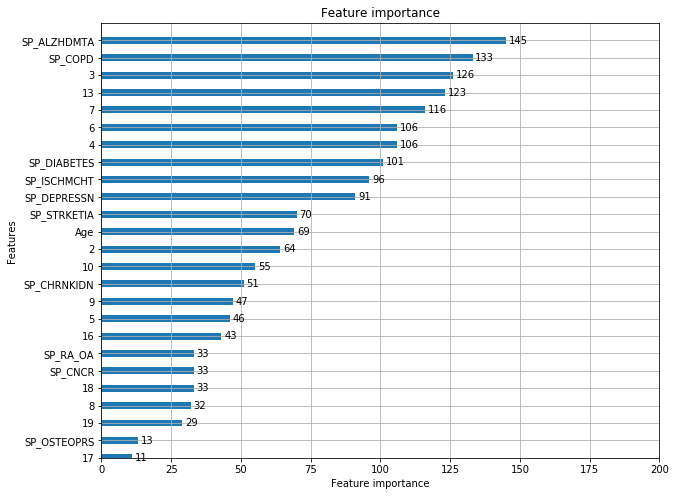

In [54]:
#Dimensionality reduction using feature importances
#features importance graph
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25,
                         ylabel='Features',
                         xlim = (0,200), ylim = (0,25), 
                         figsize = (10,8))
plt.show()

In [33]:
# For each feature of our dataset, the result of the following
# code snippet contains numbers of times a feature is used in a model.
sorted(gbm.feature_importances_,reverse=True)

[145,
 133,
 126,
 123,
 116,
 106,
 106,
 101,
 96,
 91,
 70,
 69,
 64,
 55,
 51,
 47,
 46,
 43,
 33,
 33,
 33,
 32,
 29,
 13,
 11,
 8,
 7,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0]

In [34]:
# The code below aims to find where at least 85% 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

46 0.8583333333333333


In [40]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, recall_score
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.7808578319687847


Confusion matrix:
 [[4283 1528]
 [1769 3974]]


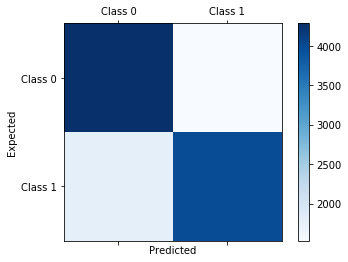

In [41]:
#Making predictions on the Test Set
y_pred = gbm.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [42]:
print(y_test.value_counts())

0    5811
1    5743
Name: HF_label, dtype: int64


In [48]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, recall_score, precision_score
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall: {0:0.4f}'.format(recall))
print('precision: {0:0.4f}'.format(precision))

The accuracy of prediction is: 0.7146442790375628
The roc_auc_score of prediction is: 0.7145116290553923
The null acccuracy is: 0.502942703825515
recall: 0.6920
precision: 0.7223


LightGBM: f1=0.707 auc=0.765


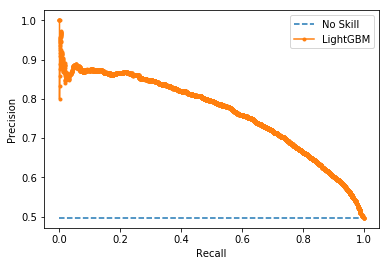

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = gbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = gbm.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('LightGBM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LightGBM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
LightGBM: ROC AUC=0.781


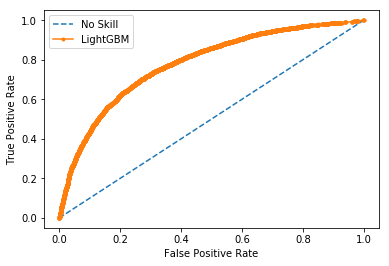

In [47]:
# now that classes are balanced, look at ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = gbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LightGBM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LightGBM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [700]:
#Drop features to reduce dimensionality to save training time and space
X = X.drop(['1', '10', '11', '12', '14', '15', '17', 'BENE_SEX',
       'SP_STATE_CODE_0', 'SP_STATE_CODE_1', 'SP_STATE_CODE_2',
       'SP_STATE_CODE_3', 'BENE_RACE_CD_0', 'BENE_RACE_CD_1',
       'BENE_RACE_CD_2'], axis=1)
X.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', '13', '16', '18', '19', 'Age'], dtype='object')

In [702]:
# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.498217	valid_0's binary_logloss: 0.689808	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496516	valid_0's binary_logloss: 0.686896	valid_0's auc: 0.601423
[3]	valid_0's l1: 0.494909	valid_0's binary_logloss: 0.684356	valid_0's auc: 0.605703
[4]	valid_0's l1: 0.493565	valid_0's binary_logloss: 0.682489	valid_0's auc: 0.605496
[5]	valid_0's l1: 0.492242	valid_0's binary_logloss: 0.680693	valid_0's auc: 0.607819
[6]	valid_0's l1: 0.491121	valid_0's binary_logloss: 0.679333	valid_0's auc: 0.607714
[7]	valid_0's l1: 0.490113	valid_0's binary_logloss: 0.678222	valid_0's auc: 0.60821
[8]	valid_0's l1: 0.48911	valid_0's binary_logloss: 0.677183	valid_0's auc: 0.608586
[9]	valid_0's l1: 0.488142	valid_0's binary_logloss: 0.676173	valid_0's auc: 0.610138
[10]	valid_0's l1: 0.487236	valid_0's binary_logloss: 0.675224	valid_0's auc: 0.61171
[11]	valid_0's l1: 0.486509	valid_0's binary_logloss: 0.674682	valid_0's auc: 0.6

[1]	valid_0's l1: 0.498155	valid_0's binary_logloss: 0.689673	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496459	valid_0's binary_logloss: 0.686797	valid_0's auc: 0.600335
[3]	valid_0's l1: 0.494989	valid_0's binary_logloss: 0.684509	valid_0's auc: 0.602786
[4]	valid_0's l1: 0.493675	valid_0's binary_logloss: 0.682628	valid_0's auc: 0.603726
[5]	valid_0's l1: 0.49245	valid_0's binary_logloss: 0.681005	valid_0's auc: 0.605443
[6]	valid_0's l1: 0.491183	valid_0's binary_logloss: 0.679302	valid_0's auc: 0.609471
[7]	valid_0's l1: 0.49021	valid_0's binary_logloss: 0.67819	valid_0's auc: 0.609996
[8]	valid_0's l1: 0.489179	valid_0's binary_logloss: 0.677018	valid_0's auc: 0.611347
[9]	valid_0's l1: 0.488291	valid_0's binary_logloss: 0.676116	valid_0's auc: 0.61191
[10]	valid_0's l1: 0.487432	valid_0's binary_logloss: 0.675257	valid_0's auc: 0.613316
[11]	valid_0's l1: 0.486651	valid_0's binary_logloss: 0.674466	valid_0's auc: 0.61

[1]	valid_0's l1: 0.498217	valid_0's binary_logloss: 0.689808	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496516	valid_0's binary_logloss: 0.686896	valid_0's auc: 0.601423
[3]	valid_0's l1: 0.494909	valid_0's binary_logloss: 0.684356	valid_0's auc: 0.605703
[4]	valid_0's l1: 0.493565	valid_0's binary_logloss: 0.682489	valid_0's auc: 0.605496
[5]	valid_0's l1: 0.492242	valid_0's binary_logloss: 0.680693	valid_0's auc: 0.607819
[6]	valid_0's l1: 0.491121	valid_0's binary_logloss: 0.679333	valid_0's auc: 0.607714
[7]	valid_0's l1: 0.490113	valid_0's binary_logloss: 0.678222	valid_0's auc: 0.60821
[8]	valid_0's l1: 0.48911	valid_0's binary_logloss: 0.677183	valid_0's auc: 0.608586
[9]	valid_0's l1: 0.488142	valid_0's binary_logloss: 0.676173	valid_0's auc: 0.610138
[10]	valid_0's l1: 0.487236	valid_0's binary_logloss: 0.675224	valid_0's auc: 0.61171
[11]	valid_0's l1: 0.486509	valid_0's binary_logloss: 0.674682	valid_0's auc: 0.6

[1]	valid_0's l1: 0.498057	valid_0's binary_logloss: 0.689489	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496331	valid_0's binary_logloss: 0.686578	valid_0's auc: 0.600364
[3]	valid_0's l1: 0.494737	valid_0's binary_logloss: 0.684116	valid_0's auc: 0.603336
[4]	valid_0's l1: 0.493393	valid_0's binary_logloss: 0.682294	valid_0's auc: 0.603096
[5]	valid_0's l1: 0.492016	valid_0's binary_logloss: 0.680461	valid_0's auc: 0.605186
[6]	valid_0's l1: 0.490773	valid_0's binary_logloss: 0.678897	valid_0's auc: 0.607588
[7]	valid_0's l1: 0.489678	valid_0's binary_logloss: 0.677724	valid_0's auc: 0.608127
[8]	valid_0's l1: 0.488646	valid_0's binary_logloss: 0.676559	valid_0's auc: 0.610268
[9]	valid_0's l1: 0.487726	valid_0's binary_logloss: 0.675656	valid_0's auc: 0.610731
[10]	valid_0's l1: 0.486826	valid_0's binary_logloss: 0.674736	valid_0's auc: 0.612653
[11]	valid_0's l1: 0.486094	valid_0's binary_logloss: 0.674106	valid_0's auc: 

[1]	valid_0's l1: 0.498155	valid_0's binary_logloss: 0.689673	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496459	valid_0's binary_logloss: 0.686797	valid_0's auc: 0.600335
[3]	valid_0's l1: 0.494989	valid_0's binary_logloss: 0.684509	valid_0's auc: 0.602786
[4]	valid_0's l1: 0.493675	valid_0's binary_logloss: 0.682628	valid_0's auc: 0.603726
[5]	valid_0's l1: 0.49245	valid_0's binary_logloss: 0.681005	valid_0's auc: 0.605443
[6]	valid_0's l1: 0.491183	valid_0's binary_logloss: 0.679302	valid_0's auc: 0.609471
[7]	valid_0's l1: 0.49021	valid_0's binary_logloss: 0.67819	valid_0's auc: 0.609996
[8]	valid_0's l1: 0.489179	valid_0's binary_logloss: 0.677018	valid_0's auc: 0.611347
[9]	valid_0's l1: 0.488291	valid_0's binary_logloss: 0.676116	valid_0's auc: 0.61191
[10]	valid_0's l1: 0.487432	valid_0's binary_logloss: 0.675257	valid_0's auc: 0.613316
[11]	valid_0's l1: 0.486651	valid_0's binary_logloss: 0.674466	valid_0's auc: 0.61

[1]	valid_0's l1: 0.498155	valid_0's binary_logloss: 0.689673	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496459	valid_0's binary_logloss: 0.686797	valid_0's auc: 0.600335
[3]	valid_0's l1: 0.494989	valid_0's binary_logloss: 0.684509	valid_0's auc: 0.602786
[4]	valid_0's l1: 0.493675	valid_0's binary_logloss: 0.682628	valid_0's auc: 0.603726
[5]	valid_0's l1: 0.49245	valid_0's binary_logloss: 0.681005	valid_0's auc: 0.605443
[6]	valid_0's l1: 0.491183	valid_0's binary_logloss: 0.679302	valid_0's auc: 0.609471
[7]	valid_0's l1: 0.49021	valid_0's binary_logloss: 0.67819	valid_0's auc: 0.609996
[8]	valid_0's l1: 0.489179	valid_0's binary_logloss: 0.677018	valid_0's auc: 0.611347
[9]	valid_0's l1: 0.488291	valid_0's binary_logloss: 0.676116	valid_0's auc: 0.61191
[10]	valid_0's l1: 0.487432	valid_0's binary_logloss: 0.675257	valid_0's auc: 0.613316
[11]	valid_0's l1: 0.486651	valid_0's binary_logloss: 0.674466	valid_0's auc: 0.61

[26]	valid_0's l1: 0.479305	valid_0's binary_logloss: 0.67002	valid_0's auc: 0.617196
[27]	valid_0's l1: 0.479082	valid_0's binary_logloss: 0.670001	valid_0's auc: 0.617147
[28]	valid_0's l1: 0.478876	valid_0's binary_logloss: 0.66995	valid_0's auc: 0.617451
[29]	valid_0's l1: 0.47867	valid_0's binary_logloss: 0.669921	valid_0's auc: 0.617393
[30]	valid_0's l1: 0.478559	valid_0's binary_logloss: 0.670033	valid_0's auc: 0.617097
[31]	valid_0's l1: 0.478364	valid_0's binary_logloss: 0.669978	valid_0's auc: 0.617254
[32]	valid_0's l1: 0.478284	valid_0's binary_logloss: 0.669974	valid_0's auc: 0.617252
[33]	valid_0's l1: 0.478178	valid_0's binary_logloss: 0.670014	valid_0's auc: 0.617324
Early stopping, best iteration is:
[28]	valid_0's l1: 0.478876	valid_0's binary_logloss: 0.66995	valid_0's auc: 0.617451
[1]	valid_0's l1: 0.498155	valid_0's binary_logloss: 0.689673	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.496459	valid_0's bi

[1]	valid_0's l1: 0.49777	valid_0's binary_logloss: 0.689042	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495693	valid_0's binary_logloss: 0.685626	valid_0's auc: 0.601094
[3]	valid_0's l1: 0.493775	valid_0's binary_logloss: 0.682764	valid_0's auc: 0.605882
[4]	valid_0's l1: 0.492269	valid_0's binary_logloss: 0.680814	valid_0's auc: 0.605259
[5]	valid_0's l1: 0.490659	valid_0's binary_logloss: 0.678767	valid_0's auc: 0.609021
[6]	valid_0's l1: 0.489411	valid_0's binary_logloss: 0.67745	valid_0's auc: 0.609219
[7]	valid_0's l1: 0.488258	valid_0's binary_logloss: 0.67634	valid_0's auc: 0.609444
[8]	valid_0's l1: 0.48725	valid_0's binary_logloss: 0.675404	valid_0's auc: 0.610006
[9]	valid_0's l1: 0.486358	valid_0's binary_logloss: 0.674784	valid_0's auc: 0.609873
[10]	valid_0's l1: 0.48539	valid_0's binary_logloss: 0.673891	valid_0's auc: 0.611802
[11]	valid_0's l1: 0.484703	valid_0's binary_logloss: 0.673594	valid_0's auc: 0.611

[1]	valid_0's l1: 0.497572	valid_0's binary_logloss: 0.688644	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495455	valid_0's binary_logloss: 0.685219	valid_0's auc: 0.601861
[3]	valid_0's l1: 0.493609	valid_0's binary_logloss: 0.68254	valid_0's auc: 0.60367
[4]	valid_0's l1: 0.49199	valid_0's binary_logloss: 0.680504	valid_0's auc: 0.60379
[5]	valid_0's l1: 0.490438	valid_0's binary_logloss: 0.678516	valid_0's auc: 0.608411
[6]	valid_0's l1: 0.489105	valid_0's binary_logloss: 0.677136	valid_0's auc: 0.609208
[7]	valid_0's l1: 0.487968	valid_0's binary_logloss: 0.676032	valid_0's auc: 0.609916
[8]	valid_0's l1: 0.486821	valid_0's binary_logloss: 0.67489	valid_0's auc: 0.611791
[9]	valid_0's l1: 0.485845	valid_0's binary_logloss: 0.674113	valid_0's auc: 0.61258
[10]	valid_0's l1: 0.484944	valid_0's binary_logloss: 0.67342	valid_0's auc: 0.613403
[11]	valid_0's l1: 0.48425	valid_0's binary_logloss: 0.672951	valid_0's auc: 0.613587

[1]	valid_0's l1: 0.497693	valid_0's binary_logloss: 0.68887	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495645	valid_0's binary_logloss: 0.685543	valid_0's auc: 0.60021
[3]	valid_0's l1: 0.493917	valid_0's binary_logloss: 0.682986	valid_0's auc: 0.604497
[4]	valid_0's l1: 0.49228	valid_0's binary_logloss: 0.680756	valid_0's auc: 0.60848
[5]	valid_0's l1: 0.490705	valid_0's binary_logloss: 0.678647	valid_0's auc: 0.612895
[6]	valid_0's l1: 0.489495	valid_0's binary_logloss: 0.677302	valid_0's auc: 0.612686
[7]	valid_0's l1: 0.48832	valid_0's binary_logloss: 0.676136	valid_0's auc: 0.612575
[8]	valid_0's l1: 0.487229	valid_0's binary_logloss: 0.675007	valid_0's auc: 0.614149
[9]	valid_0's l1: 0.486287	valid_0's binary_logloss: 0.674217	valid_0's auc: 0.614513
[10]	valid_0's l1: 0.485389	valid_0's binary_logloss: 0.673424	valid_0's auc: 0.615209
[11]	valid_0's l1: 0.484644	valid_0's binary_logloss: 0.672843	valid_0's auc: 0.615

[1]	valid_0's l1: 0.49777	valid_0's binary_logloss: 0.689042	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495693	valid_0's binary_logloss: 0.685626	valid_0's auc: 0.601094
[3]	valid_0's l1: 0.493775	valid_0's binary_logloss: 0.682764	valid_0's auc: 0.605882
[4]	valid_0's l1: 0.492269	valid_0's binary_logloss: 0.680814	valid_0's auc: 0.605259
[5]	valid_0's l1: 0.490659	valid_0's binary_logloss: 0.678767	valid_0's auc: 0.609021
[6]	valid_0's l1: 0.489411	valid_0's binary_logloss: 0.67745	valid_0's auc: 0.609219
[7]	valid_0's l1: 0.488258	valid_0's binary_logloss: 0.67634	valid_0's auc: 0.609444
[8]	valid_0's l1: 0.48725	valid_0's binary_logloss: 0.675404	valid_0's auc: 0.610006
[9]	valid_0's l1: 0.486358	valid_0's binary_logloss: 0.674784	valid_0's auc: 0.609873
[10]	valid_0's l1: 0.48539	valid_0's binary_logloss: 0.673891	valid_0's auc: 0.611802
[11]	valid_0's l1: 0.484703	valid_0's binary_logloss: 0.673594	valid_0's auc: 0.611

[1]	valid_0's l1: 0.497572	valid_0's binary_logloss: 0.688644	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495455	valid_0's binary_logloss: 0.685219	valid_0's auc: 0.601861
[3]	valid_0's l1: 0.493609	valid_0's binary_logloss: 0.68254	valid_0's auc: 0.60367
[4]	valid_0's l1: 0.49199	valid_0's binary_logloss: 0.680504	valid_0's auc: 0.60379
[5]	valid_0's l1: 0.490438	valid_0's binary_logloss: 0.678516	valid_0's auc: 0.608411
[6]	valid_0's l1: 0.489105	valid_0's binary_logloss: 0.677136	valid_0's auc: 0.609208
[7]	valid_0's l1: 0.487968	valid_0's binary_logloss: 0.676032	valid_0's auc: 0.609916
[8]	valid_0's l1: 0.486821	valid_0's binary_logloss: 0.67489	valid_0's auc: 0.611791
[9]	valid_0's l1: 0.485845	valid_0's binary_logloss: 0.674113	valid_0's auc: 0.61258
[10]	valid_0's l1: 0.484944	valid_0's binary_logloss: 0.67342	valid_0's auc: 0.613403
[11]	valid_0's l1: 0.48425	valid_0's binary_logloss: 0.672951	valid_0's auc: 0.613587

[27]	valid_0's l1: 0.477657	valid_0's binary_logloss: 0.66963	valid_0's auc: 0.618192
[28]	valid_0's l1: 0.477537	valid_0's binary_logloss: 0.66971	valid_0's auc: 0.618104
[29]	valid_0's l1: 0.47743	valid_0's binary_logloss: 0.66971	valid_0's auc: 0.618193
[30]	valid_0's l1: 0.477365	valid_0's binary_logloss: 0.669858	valid_0's auc: 0.617823
[31]	valid_0's l1: 0.47722	valid_0's binary_logloss: 0.669923	valid_0's auc: 0.617535
Early stopping, best iteration is:
[26]	valid_0's l1: 0.477772	valid_0's binary_logloss: 0.669551	valid_0's auc: 0.618436
[1]	valid_0's l1: 0.497693	valid_0's binary_logloss: 0.68887	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.495645	valid_0's binary_logloss: 0.685543	valid_0's auc: 0.60021
[3]	valid_0's l1: 0.493917	valid_0's binary_logloss: 0.682986	valid_0's auc: 0.604497
[4]	valid_0's l1: 0.49228	valid_0's binary_logloss: 0.680756	valid_0's auc: 0.60848
[5]	valid_0's l1: 0.490705	valid_0's binary_log

[1]	valid_0's l1: 0.497325	valid_0's binary_logloss: 0.688304	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494899	valid_0's binary_logloss: 0.684476	valid_0's auc: 0.601098
[3]	valid_0's l1: 0.492631	valid_0's binary_logloss: 0.681232	valid_0's auc: 0.606594
[4]	valid_0's l1: 0.490883	valid_0's binary_logloss: 0.679152	valid_0's auc: 0.606536
[5]	valid_0's l1: 0.489356	valid_0's binary_logloss: 0.677462	valid_0's auc: 0.607727
[6]	valid_0's l1: 0.48805	valid_0's binary_logloss: 0.676271	valid_0's auc: 0.607945
[7]	valid_0's l1: 0.48667	valid_0's binary_logloss: 0.674848	valid_0's auc: 0.611238
[8]	valid_0's l1: 0.485575	valid_0's binary_logloss: 0.674056	valid_0's auc: 0.611847
[9]	valid_0's l1: 0.484544	valid_0's binary_logloss: 0.673223	valid_0's auc: 0.613213
[10]	valid_0's l1: 0.483676	valid_0's binary_logloss: 0.672752	valid_0's auc: 0.614028
[11]	valid_0's l1: 0.482961	valid_0's binary_logloss: 0.672328	valid_0's auc: 0.

[1]	valid_0's l1: 0.497232	valid_0's binary_logloss: 0.688094	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494906	valid_0's binary_logloss: 0.684433	valid_0's auc: 0.601598
[3]	valid_0's l1: 0.492913	valid_0's binary_logloss: 0.68161	valid_0's auc: 0.607793
[4]	valid_0's l1: 0.491139	valid_0's binary_logloss: 0.679377	valid_0's auc: 0.6095
[5]	valid_0's l1: 0.489619	valid_0's binary_logloss: 0.677705	valid_0's auc: 0.609851
[6]	valid_0's l1: 0.488218	valid_0's binary_logloss: 0.676148	valid_0's auc: 0.612149
[7]	valid_0's l1: 0.486886	valid_0's binary_logloss: 0.674804	valid_0's auc: 0.614007
[8]	valid_0's l1: 0.485763	valid_0's binary_logloss: 0.673766	valid_0's auc: 0.615222
[9]	valid_0's l1: 0.484799	valid_0's binary_logloss: 0.672963	valid_0's auc: 0.616046
[10]	valid_0's l1: 0.483743	valid_0's binary_logloss: 0.671958	valid_0's auc: 0.61838
[11]	valid_0's l1: 0.482972	valid_0's binary_logloss: 0.67157	valid_0's auc: 0.618

[1]	valid_0's l1: 0.497325	valid_0's binary_logloss: 0.688304	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494899	valid_0's binary_logloss: 0.684476	valid_0's auc: 0.601098
[3]	valid_0's l1: 0.492631	valid_0's binary_logloss: 0.681232	valid_0's auc: 0.606594
[4]	valid_0's l1: 0.490883	valid_0's binary_logloss: 0.679152	valid_0's auc: 0.606536
[5]	valid_0's l1: 0.489356	valid_0's binary_logloss: 0.677462	valid_0's auc: 0.607727
[6]	valid_0's l1: 0.48805	valid_0's binary_logloss: 0.676271	valid_0's auc: 0.607945
[7]	valid_0's l1: 0.48667	valid_0's binary_logloss: 0.674848	valid_0's auc: 0.611238
[8]	valid_0's l1: 0.485575	valid_0's binary_logloss: 0.674056	valid_0's auc: 0.611847
[9]	valid_0's l1: 0.484544	valid_0's binary_logloss: 0.673223	valid_0's auc: 0.613213
[10]	valid_0's l1: 0.483676	valid_0's binary_logloss: 0.672752	valid_0's auc: 0.614028
[11]	valid_0's l1: 0.482961	valid_0's binary_logloss: 0.672328	valid_0's auc: 0.

[1]	valid_0's l1: 0.497086	valid_0's binary_logloss: 0.687827	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494552	valid_0's binary_logloss: 0.683813	valid_0's auc: 0.60426
[3]	valid_0's l1: 0.492431	valid_0's binary_logloss: 0.680996	valid_0's auc: 0.604319
[4]	valid_0's l1: 0.490681	valid_0's binary_logloss: 0.678951	valid_0's auc: 0.605205
[5]	valid_0's l1: 0.489034	valid_0's binary_logloss: 0.677232	valid_0's auc: 0.606496
[6]	valid_0's l1: 0.487573	valid_0's binary_logloss: 0.67568	valid_0's auc: 0.609095
[7]	valid_0's l1: 0.486394	valid_0's binary_logloss: 0.674704	valid_0's auc: 0.609868
[8]	valid_0's l1: 0.485368	valid_0's binary_logloss: 0.673957	valid_0's auc: 0.610941
[9]	valid_0's l1: 0.484416	valid_0's binary_logloss: 0.673349	valid_0's auc: 0.61123
[10]	valid_0's l1: 0.483496	valid_0's binary_logloss: 0.672643	valid_0's auc: 0.612326
[11]	valid_0's l1: 0.482624	valid_0's binary_logloss: 0.672043	valid_0's auc: 0.6

[26]	valid_0's l1: 0.477346	valid_0's binary_logloss: 0.670714	valid_0's auc: 0.61552
[27]	valid_0's l1: 0.477192	valid_0's binary_logloss: 0.670751	valid_0's auc: 0.615593
[28]	valid_0's l1: 0.477001	valid_0's binary_logloss: 0.670751	valid_0's auc: 0.615611
[29]	valid_0's l1: 0.476851	valid_0's binary_logloss: 0.670771	valid_0's auc: 0.615513
Early stopping, best iteration is:
[24]	valid_0's l1: 0.477511	valid_0's binary_logloss: 0.670368	valid_0's auc: 0.616479
[1]	valid_0's l1: 0.497232	valid_0's binary_logloss: 0.688094	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494906	valid_0's binary_logloss: 0.684433	valid_0's auc: 0.601598
[3]	valid_0's l1: 0.492913	valid_0's binary_logloss: 0.68161	valid_0's auc: 0.607793
[4]	valid_0's l1: 0.491139	valid_0's binary_logloss: 0.679377	valid_0's auc: 0.6095
[5]	valid_0's l1: 0.489619	valid_0's binary_logloss: 0.677705	valid_0's auc: 0.609851
[6]	valid_0's l1: 0.488218	valid_0's binary

[17]	valid_0's l1: 0.479622	valid_0's binary_logloss: 0.669898	valid_0's auc: 0.619295
[18]	valid_0's l1: 0.479356	valid_0's binary_logloss: 0.669889	valid_0's auc: 0.619376
[19]	valid_0's l1: 0.478942	valid_0's binary_logloss: 0.669767	valid_0's auc: 0.619629
[20]	valid_0's l1: 0.478724	valid_0's binary_logloss: 0.669829	valid_0's auc: 0.619107
[21]	valid_0's l1: 0.478374	valid_0's binary_logloss: 0.669617	valid_0's auc: 0.619669
Early stopping, best iteration is:
[16]	valid_0's l1: 0.479973	valid_0's binary_logloss: 0.669882	valid_0's auc: 0.619704
[1]	valid_0's l1: 0.49688	valid_0's binary_logloss: 0.687595	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494157	valid_0's binary_logloss: 0.683459	valid_0's auc: 0.601157
[3]	valid_0's l1: 0.491602	valid_0's binary_logloss: 0.68	valid_0's auc: 0.606703
[4]	valid_0's l1: 0.489644	valid_0's binary_logloss: 0.677809	valid_0's auc: 0.607765
[5]	valid_0's l1: 0.488025	valid_0's binary

[1]	valid_0's l1: 0.496772	valid_0's binary_logloss: 0.687346	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494032	valid_0's binary_logloss: 0.683161	valid_0's auc: 0.60488
[3]	valid_0's l1: 0.491922	valid_0's binary_logloss: 0.680436	valid_0's auc: 0.605927
[4]	valid_0's l1: 0.489769	valid_0's binary_logloss: 0.677659	valid_0's auc: 0.6123
[5]	valid_0's l1: 0.488245	valid_0's binary_logloss: 0.676188	valid_0's auc: 0.611224
[6]	valid_0's l1: 0.486743	valid_0's binary_logloss: 0.674847	valid_0's auc: 0.612136
[7]	valid_0's l1: 0.485273	valid_0's binary_logloss: 0.673337	valid_0's auc: 0.615438
[8]	valid_0's l1: 0.484104	valid_0's binary_logloss: 0.672449	valid_0's auc: 0.615621
[9]	valid_0's l1: 0.483283	valid_0's binary_logloss: 0.67198	valid_0's auc: 0.615673
[10]	valid_0's l1: 0.482373	valid_0's binary_logloss: 0.671242	valid_0's auc: 0.616745
[11]	valid_0's l1: 0.481639	valid_0's binary_logloss: 0.67086	valid_0's auc: 0.617

[1]	valid_0's l1: 0.496602	valid_0's binary_logloss: 0.687039	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493709	valid_0's binary_logloss: 0.682633	valid_0's auc: 0.604208
[3]	valid_0's l1: 0.491356	valid_0's binary_logloss: 0.679726	valid_0's auc: 0.604546
[4]	valid_0's l1: 0.489414	valid_0's binary_logloss: 0.677602	valid_0's auc: 0.606515
[5]	valid_0's l1: 0.487816	valid_0's binary_logloss: 0.676179	valid_0's auc: 0.607623
[6]	valid_0's l1: 0.486512	valid_0's binary_logloss: 0.675136	valid_0's auc: 0.608443
[7]	valid_0's l1: 0.485195	valid_0's binary_logloss: 0.673949	valid_0's auc: 0.610731
[8]	valid_0's l1: 0.483811	valid_0's binary_logloss: 0.672763	valid_0's auc: 0.613465
[9]	valid_0's l1: 0.482832	valid_0's binary_logloss: 0.67208	valid_0's auc: 0.614173
[10]	valid_0's l1: 0.482085	valid_0's binary_logloss: 0.671679	valid_0's auc: 0.61437
[11]	valid_0's l1: 0.481323	valid_0's binary_logloss: 0.671319	valid_0's auc: 0.

[1]	valid_0's l1: 0.49688	valid_0's binary_logloss: 0.687595	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.494157	valid_0's binary_logloss: 0.683459	valid_0's auc: 0.601157
[3]	valid_0's l1: 0.491602	valid_0's binary_logloss: 0.68	valid_0's auc: 0.606703
[4]	valid_0's l1: 0.489644	valid_0's binary_logloss: 0.677809	valid_0's auc: 0.607765
[5]	valid_0's l1: 0.488025	valid_0's binary_logloss: 0.676239	valid_0's auc: 0.608629
[6]	valid_0's l1: 0.486466	valid_0's binary_logloss: 0.674769	valid_0's auc: 0.610665
[7]	valid_0's l1: 0.485373	valid_0's binary_logloss: 0.674122	valid_0's auc: 0.610011
[8]	valid_0's l1: 0.484139	valid_0's binary_logloss: 0.67313	valid_0's auc: 0.611874
[9]	valid_0's l1: 0.483186	valid_0's binary_logloss: 0.672614	valid_0's auc: 0.612156
[10]	valid_0's l1: 0.482315	valid_0's binary_logloss: 0.672208	valid_0's auc: 0.613098
[11]	valid_0's l1: 0.481605	valid_0's binary_logloss: 0.671921	valid_0's auc: 0.6135

[1]	valid_0's l1: 0.496602	valid_0's binary_logloss: 0.687039	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493709	valid_0's binary_logloss: 0.682633	valid_0's auc: 0.604208
[3]	valid_0's l1: 0.491356	valid_0's binary_logloss: 0.679726	valid_0's auc: 0.604546
[4]	valid_0's l1: 0.489414	valid_0's binary_logloss: 0.677602	valid_0's auc: 0.606515
[5]	valid_0's l1: 0.487816	valid_0's binary_logloss: 0.676179	valid_0's auc: 0.607623
[6]	valid_0's l1: 0.486512	valid_0's binary_logloss: 0.675136	valid_0's auc: 0.608443
[7]	valid_0's l1: 0.485195	valid_0's binary_logloss: 0.673949	valid_0's auc: 0.610731
[8]	valid_0's l1: 0.483811	valid_0's binary_logloss: 0.672763	valid_0's auc: 0.613465
[9]	valid_0's l1: 0.482832	valid_0's binary_logloss: 0.67208	valid_0's auc: 0.614173
[10]	valid_0's l1: 0.482085	valid_0's binary_logloss: 0.671679	valid_0's auc: 0.61437
[11]	valid_0's l1: 0.481323	valid_0's binary_logloss: 0.671319	valid_0's auc: 0.

[1]	valid_0's l1: 0.496435	valid_0's binary_logloss: 0.686915	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493413	valid_0's binary_logloss: 0.682513	valid_0's auc: 0.600892
[3]	valid_0's l1: 0.490672	valid_0's binary_logloss: 0.678964	valid_0's auc: 0.606912
[4]	valid_0's l1: 0.48876	valid_0's binary_logloss: 0.677121	valid_0's auc: 0.605397
[5]	valid_0's l1: 0.486925	valid_0's binary_logloss: 0.675434	valid_0's auc: 0.608061
[6]	valid_0's l1: 0.48564	valid_0's binary_logloss: 0.674721	valid_0's auc: 0.607492
[7]	valid_0's l1: 0.484424	valid_0's binary_logloss: 0.673907	valid_0's auc: 0.608958
[8]	valid_0's l1: 0.483091	valid_0's binary_logloss: 0.672784	valid_0's auc: 0.611904
[9]	valid_0's l1: 0.482099	valid_0's binary_logloss: 0.672196	valid_0's auc: 0.613084
[10]	valid_0's l1: 0.481398	valid_0's binary_logloss: 0.671923	valid_0's auc: 0.613662
[11]	valid_0's l1: 0.480603	valid_0's binary_logloss: 0.671616	valid_0's auc: 0.

[1]	valid_0's l1: 0.496312	valid_0's binary_logloss: 0.686624	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493238	valid_0's binary_logloss: 0.68209	valid_0's auc: 0.605184
[3]	valid_0's l1: 0.49081	valid_0's binary_logloss: 0.679075	valid_0's auc: 0.607917
[4]	valid_0's l1: 0.488611	valid_0's binary_logloss: 0.676467	valid_0's auc: 0.612803
[5]	valid_0's l1: 0.486979	valid_0's binary_logloss: 0.675035	valid_0's auc: 0.611943
[6]	valid_0's l1: 0.48557	valid_0's binary_logloss: 0.674039	valid_0's auc: 0.61179
[7]	valid_0's l1: 0.483904	valid_0's binary_logloss: 0.672292	valid_0's auc: 0.616407
[8]	valid_0's l1: 0.482891	valid_0's binary_logloss: 0.671692	valid_0's auc: 0.616449
[9]	valid_0's l1: 0.481892	valid_0's binary_logloss: 0.671094	valid_0's auc: 0.616571
[10]	valid_0's l1: 0.480922	valid_0's binary_logloss: 0.670441	valid_0's auc: 0.617951
[11]	valid_0's l1: 0.480255	valid_0's binary_logloss: 0.67007	valid_0's auc: 0.618

[1]	valid_0's l1: 0.496118	valid_0's binary_logloss: 0.686279	valid_0's auc: 0.598617
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.492953	valid_0's binary_logloss: 0.681679	valid_0's auc: 0.603417
[3]	valid_0's l1: 0.490447	valid_0's binary_logloss: 0.678726	valid_0's auc: 0.604358
[4]	valid_0's l1: 0.48832	valid_0's binary_logloss: 0.676504	valid_0's auc: 0.606847
[5]	valid_0's l1: 0.48665	valid_0's binary_logloss: 0.675136	valid_0's auc: 0.608453
[6]	valid_0's l1: 0.485084	valid_0's binary_logloss: 0.673739	valid_0's auc: 0.611088
[7]	valid_0's l1: 0.483876	valid_0's binary_logloss: 0.673055	valid_0's auc: 0.611424
[8]	valid_0's l1: 0.482636	valid_0's binary_logloss: 0.672195	valid_0's auc: 0.612654
[9]	valid_0's l1: 0.481703	valid_0's binary_logloss: 0.671746	valid_0's auc: 0.613407
[10]	valid_0's l1: 0.481017	valid_0's binary_logloss: 0.671473	valid_0's auc: 0.613552
[11]	valid_0's l1: 0.480365	valid_0's binary_logloss: 0.671143	valid_0's auc: 0.

[1]	valid_0's l1: 0.496435	valid_0's binary_logloss: 0.686915	valid_0's auc: 0.591779
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493413	valid_0's binary_logloss: 0.682513	valid_0's auc: 0.600892
[3]	valid_0's l1: 0.490672	valid_0's binary_logloss: 0.678964	valid_0's auc: 0.606912
[4]	valid_0's l1: 0.48876	valid_0's binary_logloss: 0.677121	valid_0's auc: 0.605397
[5]	valid_0's l1: 0.486925	valid_0's binary_logloss: 0.675434	valid_0's auc: 0.608061
[6]	valid_0's l1: 0.48564	valid_0's binary_logloss: 0.674721	valid_0's auc: 0.607492
[7]	valid_0's l1: 0.484424	valid_0's binary_logloss: 0.673907	valid_0's auc: 0.608958
[8]	valid_0's l1: 0.483091	valid_0's binary_logloss: 0.672784	valid_0's auc: 0.611904
[9]	valid_0's l1: 0.482099	valid_0's binary_logloss: 0.672196	valid_0's auc: 0.613084
[10]	valid_0's l1: 0.481398	valid_0's binary_logloss: 0.671923	valid_0's auc: 0.613662
[11]	valid_0's l1: 0.480603	valid_0's binary_logloss: 0.671616	valid_0's auc: 0.

[1]	valid_0's l1: 0.496312	valid_0's binary_logloss: 0.686624	valid_0's auc: 0.597275
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.493238	valid_0's binary_logloss: 0.68209	valid_0's auc: 0.605184
[3]	valid_0's l1: 0.49081	valid_0's binary_logloss: 0.679075	valid_0's auc: 0.607917
[4]	valid_0's l1: 0.488611	valid_0's binary_logloss: 0.676467	valid_0's auc: 0.612803
[5]	valid_0's l1: 0.486979	valid_0's binary_logloss: 0.675035	valid_0's auc: 0.611943
[6]	valid_0's l1: 0.48557	valid_0's binary_logloss: 0.674039	valid_0's auc: 0.61179
[7]	valid_0's l1: 0.483904	valid_0's binary_logloss: 0.672292	valid_0's auc: 0.616407
[8]	valid_0's l1: 0.482891	valid_0's binary_logloss: 0.671692	valid_0's auc: 0.616449
[9]	valid_0's l1: 0.481892	valid_0's binary_logloss: 0.671094	valid_0's auc: 0.616571
[10]	valid_0's l1: 0.480922	valid_0's binary_logloss: 0.670441	valid_0's auc: 0.617951
[11]	valid_0's l1: 0.480255	valid_0's binary_logloss: 0.67007	valid_0's auc: 0.618

[25]	valid_0's l1: 0.479963	valid_0's binary_logloss: 0.669881	valid_0's auc: 0.618342
[26]	valid_0's l1: 0.47964	valid_0's binary_logloss: 0.669664	valid_0's auc: 0.618858
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.47964	valid_0's binary_logloss: 0.669664	valid_0's auc: 0.618858
Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 26}


In [ ]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 26)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

In [ ]:
#Dimensionality reduction using feature importances
#features importance graph
ax = lgb.plot_importance(gbm, height = 0.5, 
                         max_num_features = 15,
                         ylabel='Features',
                         xlim = (0,125), ylim = (0,15), 
                         figsize = (15,10))
plt.show()

In [ ]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC with dimensionality reduction: \n' + auc_roc_0)

In [736]:
print(y_test.value_counts())

0    5811
1    5743
Name: HF_label, dtype: int64


In [ ]:
#Making predictions on the Test Set
y_pred = gbm.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall: {0:0.2f}'.format(recall))
print('precision: {0:0.2f}'.format(precision))

##### Keeping track of changes and results:
- Using Median(days_op_to_ip) column, this is for any IP event, not just CHF 4280, don't see value in using and feel that it is giving inaccurate results.  (recall: 0.99, precision: 0.72, acc: 0.8074, ROC AUC: 0.8408)
- After removing Median(days_op_to_ip) column (recall: 0.52, precision: 0.59, acc: 0.5827, ROC AUC: 0.6177)
- Only keep top 85% features (recall: 0.53, precision: 0.59, acc: 0.5826, ROC AUC: 0.62034)